# Учебный проект "Исследование объявлений о продаже квартир"

 

>## Цель:
**Определение рыночной стоимости объектов недвижимости для построения автоматизированной системы оценки аномалий и мошеннической деятельности**

>## Задачи:
>- Извлечь общую информацию
>- Предобработать данные
>- Оценить выбросы, установить ключевые параметры, внести необходимые изменения в исходный датафрейм
>- Провести исследовательский анализ полученных данных
>- Сделать общие выводы на основе анализа

___


**Оглавление**

- <a id='1'>Блок "Открытие файла и извлечение общей информации"</a>
- <a id='9'>Блок "Иллюстрация метода .describe() диаграммами размаха"</a>
- <a id='10'>Блок "Предобработка данных"</a>
- <a id='42'>Блок "Рассчет параметров и добавление данных в таблицу"</a>
- <a id='56'>Блок "Исследовательский анализ данных"</a>
- <a id='70'>Блок "Анализ корреляции"</a>
- <a id='80'>Блок "Исследование 10 населенных пунктов с максимальным числом объявлений"</a>
- <a id='96'>Блок "Изучение предложений по квартирам в зависимости от удаленности от центра"</a>
- <a id='85'>Блок "Анализ сегмента квартир в центре города"</a>
- <a id='88'>Блок "Выделение дополнительных факторов, влияющих на стоимость квартиры"</a>
- <a id='103'>Блок "Проверка корректности выводов с помощью корреляции"</a>
- <a id='108'>Блок "Сравнение корреляционных матриц"</a>
- <a id='138'>Блок "Обощенная корреляционная матрица heatmap. Общие выводы"</a>



___

### Шаг 1. Открытие файла и извлечение общей информации

Импорт необходимых для исследования библиотек, чтение  dataset и извлечение общей информации стандартными методами <span style=color:red> .head()  .tail()  .sample()  .describe()  .info()</span>

In [21]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pprint



In [22]:
data=pd.read_csv('/Users/denisbogomolov/Documents/Data_Analysis/real_estate_data.csv', sep='\t')

In [23]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [24]:
# Время от времени, между столбцами 'is_apartment'и 'kitchen_area' не отображаются столбцы (стоит ...)
# Гарантированно откроем все столбцы датасета
pd.set_option('display.max_columns', None)

In [25]:
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18460,4,5690000.0,64.6,2017-09-26T00:00:00,3,2.50,12.0,39.6,3,NaN,False,False,9.20,NaN,Санкт-Петербург,49065.0,16735.0,1.0,501.0,0.0,NaN,117.0
15134,14,3250000.0,34.0,2017-12-19T00:00:00,1,NaN,24.0,18.0,17,NaN,False,False,8.60,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,234.0
19820,12,5800000.0,53.0,2018-01-14T00:00:00,2,NaN,5.0,33.6,3,NaN,False,False,9.10,NaN,Санкт-Петербург,25335.0,4235.0,0.0,NaN,0.0,NaN,199.0
14522,15,6735600.0,88.8,2019-02-25T00:00:00,3,NaN,5.0,57.1,1,NaN,False,False,10.73,NaN,Санкт-Петербург,27380.0,6227.0,3.0,144.0,2.0,428.0,NaN
9726,16,5850000.0,85.0,2017-11-27T00:00:00,3,2.80,17.0,53.0,16,NaN,False,False,17.00,NaN,Санкт-Петербург,16087.0,14883.0,0.0,NaN,0.0,NaN,79.0
4056,13,4400000.0,61.7,2019-04-18T00:00:00,3,2.57,9.0,43.4,3,NaN,False,False,6.30,2.0,Санкт-Петербург,14549.0,21815.0,1.0,827.0,2.0,187.0,NaN
1364,8,3550000.0,51.0,2017-05-19T00:00:00,2,NaN,8.0,24.5,7,NaN,False,False,9.00,NaN,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,419.0
16944,20,3900000.0,38.3,2018-02-07T00:00:00,1,NaN,9.0,NaN,6,NaN,False,False,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17151,12,5840000.0,58.5,2018-10-16T00:00:00,3,2.70,10.0,54.5,8,NaN,False,False,7.10,1.0,Санкт-Петербург,26190.0,13893.0,0.0,NaN,0.0,NaN,NaN
14117,11,4550000.0,45.0,2018-10-23T00:00:00,2,NaN,5.0,30.3,4,NaN,False,False,7.00,NaN,Санкт-Петербург,15187.0,13727.0,1.0,572.0,0.0,NaN,43.0


In [27]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### *Промежуточные выводы* (1)
- В названии столбца 'cityCenters_nearest' необходимо заменить регистр
- Много отсуствующих данных в столбце 'ceiling_height', однако есть потолок высотой в **сто метров**
- Есть квартиры с 19 комнатами. Безусловно, такое возможно, однако, требуется проверка
- Много отсутствующих данных в столбцах, описывающих расположение дома
- В столбце 'is_apartment', судя по всему, подавляющее количество NaN
- Названия столбцов 'parks_around3000' и 'ponds_around3000' неочевидны - стоит поменять названия
- В столбце 'balcony' присутствуют как нулевые значения, так и Nan, что также требует замены

### *Гипотезы на основе промежуточных выводов* (1)
- Вполне возможно, что данные о высоте потолков равно как и данные о расположении домов зачастую не рассматриваются как важные и, потому пропускаются
- Возможно, огромное число NaN в столбце 'is_apartment' вызвано тем, что определение "апартаменты" весьма неоднозначное и может трактоваться по-разному. Вполне вероятно, что NaN - это, на самом деле, False, то есть "не аппартаменты"
- Nan в столбце 'balcony' - это, скорее всего, фактическое отсутствие балкона в квартире, которое просто не обозначено нулем

___


<span style=color:red>Проиллюстрируем результаты метода .describe() диаграммами размаха по нескольким столбцам. Заодно оценим величину "хвостов" в столбцах с сомнительными данными, например в 'ceiling_height'</span>

total_area                AxesSubplot(0.125,0.657941;0.227941x0.222059)
rooms                  AxesSubplot(0.398529,0.657941;0.227941x0.222059)
ceiling_height         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
living_area               AxesSubplot(0.125,0.391471;0.227941x0.222059)
airports_nearest       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
cityCenters_nearest    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

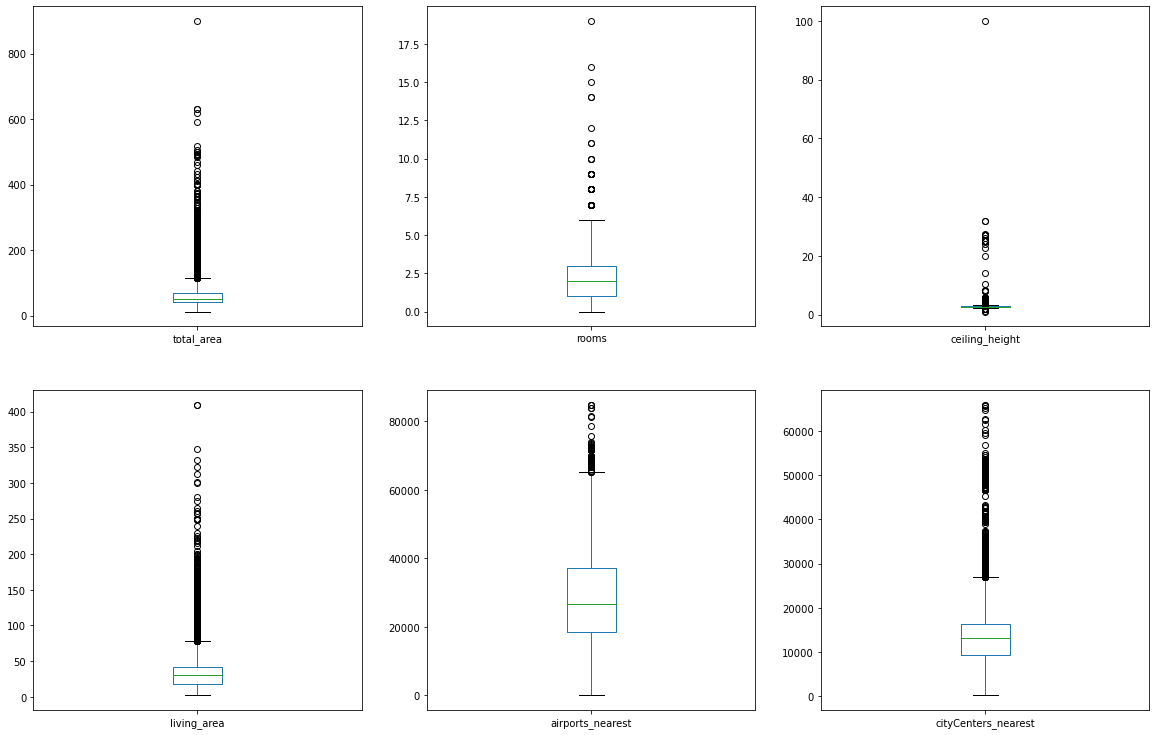

In [29]:
#Создаем список из столбцов
box_list=['total_area', 'rooms','ceiling_height', 'living_area','airports_nearest', 'cityCenters_nearest']

#Используем метод .plot() для создания диаграмм
data[box_list].plot(kind='box', subplots=True, layout=(3,3), figsize=(20,20))

### Вывод

- Названия некоторых столбцов требуют замены и / или корректировки
- Большое количество данных отсутствует и требует замены
- Присутствуют явно некорректные данные, которые могут потенциально влиять на дальнейший ход работы
- Некорректные данные нужно либо заменить, либо удалить

___

### Шаг 2. Предобработка данных

**Дальнейшие действия**:

- Проверка датасета на наличие дубликатов
- Замена / корректировка названий столбцов
- Формулировка текущих гипотез (2)
- Определение пропущенных значений и заполнение пропусков
- Обсуждение причин, которые могли привести к пропускам в данных
- Приведение данных к нужным типам
- Формулировка промежуточных выводов (2)

In [30]:
# Проверим dataset на наличие дубликатов
data.duplicated().sum()

0

___

In [31]:
# Замена и корректировка названий столбцов
# Выводим исходный список названий столбцов
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [32]:
# Переименовываем столбцы / корректируем существующие названия столбцов
cols=['total_images',
     'last_price',
     'total_area_sqm',
     'first_day_exposition',
     'rooms_num',
     'ceiling_height_m',
     'total_floors_num',
     'living_area_sqm',
     'curr_floor',
     'is_apartment',
     'is_studio',
     'is_open_plan',
     'kitchen_area_sqm',
     'balconies_num',
     'location_name',
     'nearest_airport_distance_m',
     'city_center_distance_m',
     'parks_num_3km',
     'nearest_park_distance_m',
     'ponds_num_3km',
     'nearest_ponds_distance_m',
     'days_exposition']
data.set_axis(cols, axis='columns', inplace=True)

In [33]:
# Выводим список измененных столбцов
data.columns.tolist()

['total_images',
 'last_price',
 'total_area_sqm',
 'first_day_exposition',
 'rooms_num',
 'ceiling_height_m',
 'total_floors_num',
 'living_area_sqm',
 'curr_floor',
 'is_apartment',
 'is_studio',
 'is_open_plan',
 'kitchen_area_sqm',
 'balconies_num',
 'location_name',
 'nearest_airport_distance_m',
 'city_center_distance_m',
 'parks_num_3km',
 'nearest_park_distance_m',
 'ponds_num_3km',
 'nearest_ponds_distance_m',
 'days_exposition']

In [34]:
# Проверяем, все ли отредактированные столбцы отображаются корректно
data.head(10)

,total_images,last_price,total_area_sqm,first_day_exposition,rooms_num,ceiling_height_m,total_floors_num,living_area_sqm,curr_floor,is_apartment,is_studio,is_open_plan,kitchen_area_sqm,balconies_num,location_name,nearest_airport_distance_m,city_center_distance_m,parks_num_3km,nearest_park_distance_m,ponds_num_3km,nearest_ponds_distance_m,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


___

In [35]:
# Проверяем датасет на наличие пропусков .isnull(); суммируем пропуски .sum(); сортируем .sort_values()
data.isnull().sum().sort_values()

total_images                      0
is_open_plan                      0
curr_floor                        0
rooms_num                         0
is_studio                         0
total_area_sqm                    0
last_price                        0
first_day_exposition              0
location_name                    49
total_floors_num                 86
living_area_sqm                1903
kitchen_area_sqm               2278
days_exposition                3181
ponds_num_3km                  5518
parks_num_3km                  5518
city_center_distance_m         5519
nearest_airport_distance_m     5542
ceiling_height_m               9195
balconies_num                 11519
nearest_ponds_distance_m      14589
nearest_park_distance_m       15620
is_apartment                  20924
dtype: int64

In [36]:
# Теперь оцениваем пропуски в процентном соотношении
data.isnull().sum().sort_values()/data.shape[0]*100

total_images                   0.000000
is_open_plan                   0.000000
curr_floor                     0.000000
rooms_num                      0.000000
is_studio                      0.000000
total_area_sqm                 0.000000
last_price                     0.000000
first_day_exposition           0.000000
location_name                  0.206760
total_floors_num               0.362885
living_area_sqm                8.029875
kitchen_area_sqm               9.612220
days_exposition               13.422507
ponds_num_3km                 23.283683
parks_num_3km                 23.283683
city_center_distance_m        23.287902
nearest_airport_distance_m    23.384953
ceiling_height_m              38.799105
balconies_num                 48.605426
nearest_ponds_distance_m      61.559559
nearest_park_distance_m       65.909954
is_apartment                  88.290645
dtype: float64

___

### *Формулировка текущих гипотез* (2)
- Процент пропусков, начиная с **'balconies_num'** сначала стремится к 50%, а потом и переваливает через эту величину. 
- Весьма вероятно, что многочисленные пропуски в 'balconies_num' - это, на самом деле, отсутствие балкона.
- Пропуски в столбце **'is_apartment'** величиной 88% можно трактовать как иллюстрацию неопределенности статуса "апартаменты": человек не понимает, что это такое и просто пропускает данную позицию, никак ее не отмечая.
- Многочисленные пропуски в **'nearest_ponds_distance_m'** и **'nearest_park_distance_m'** можно объяснить отсутствием информации и/ или нежеланием выяснять расстояние до ближайшего парка или пруда.


___

In [37]:
# Производим замену NaN в 'balconies_num' на нулевые значения: 
# согласно выдвинутой гипотезе, 'NaN' в данном столбце - отсутствие балкона
data['balconies_num']=data['balconies_num'].fillna(0)
print('Количество NaN в balconies_num:', data['balconies_num'].isnull().sum())

Количество NaN в balconies_num: 0


___

In [38]:
# Работаем со столбцом 'location_name'
len(data['location_name'].unique())


365

In [39]:
# Пробуем заменить заглавные буквы на строчные; проверяем полученные результаты
data['location_name']=data['location_name'].str.lower()
len(data['location_name'].unique())

365

In [40]:
# Пробуем заменить "ё" на "е"; проверяем результаты
data['location_name'] = data['location_name'].str.replace('ё', 'е', regex=True)
len(data['location_name'].unique())

331

In [41]:
# Проверяем столбец методом .isna() и .sum()
data['location_name'].isna().sum()

49

<span style=color:red>Важное замечание!</span>
Строки с отсутствующим названием населенного пункта можно удалить, поскольку без привязки (указания) к конкретному населенному пункту, все остальные данные не имеют никакого смысла: зачем клиенту высота потолка, этаж или количество комнат, если не известно, ГДЕ находится жилплощадь?

In [42]:
# Удаляем строки без указания населенного пункта
data=data.dropna(subset=['location_name'])

# Еще раз проверяем
data['location_name'].isnull().sum()

0

___

In [43]:
# Изучаем количество пропусков в столбце 'ceiling_height_m'
data['ceiling_height_m'].isnull().sum()

9160

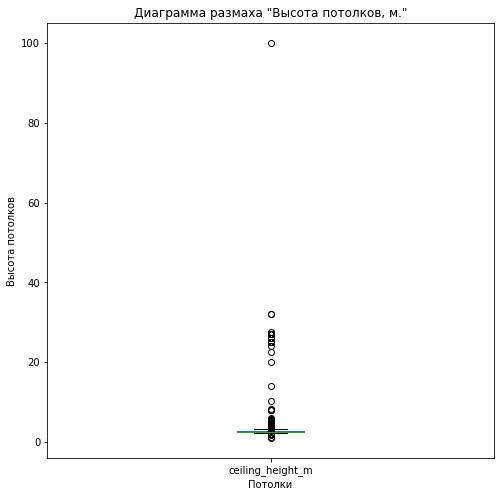

In [44]:
# Еще раз посмотрим на выбросы в гистограмме по столбцу 'ceiling_height_m'
data['ceiling_height_m'].plot(kind='box', subplots=True, figsize=(8,8))
plt.title('Диаграмма размаха "Высота потолков, м."')
plt.xlabel('Потолки')
plt.ylabel('Высота потолков')
plt.show()


In [45]:
# Логично предположить, что потолок высотой менее 2 метров и более 5 метров - это эксцессы
# Создаем срез и считаем долю потолков высотой менее 2 метров и высотой более 5 метров 
print('Доля потолков высотой менее 2 метров:',len(data.query('ceiling_height_m<2'))/len(data))
print()
print('Доля потолков высотой более 5 метров:',len(data.query('ceiling_height_m>5'))/len(data))

Доля потолков высотой менее 2 метров: 0.00012684989429175475

Доля потолков высотой более 5 метров: 0.001522198731501057


<span style=color:red>Важно!</span> Доля очень низких (меньше 2 метров) и очень высоких (более 5 метров) потолков минимальна и на дальнейшие рассчеты существенным образом не повлияет.

In [46]:
# Рассчитываем медианное значение для столбца 'ceiling_height_m'
data['ceiling_height_m'].median()

2.65

In [47]:
# Меняем пропуски в столбце на медианные значения
data['ceiling_height_m'].fillna(data['ceiling_height_m'].median(),inplace=True)

In [48]:
# Проверяем результаты замены
data['ceiling_height_m'].isnull().sum()

0

___

In [49]:
# Проверяем столбцы:
# 'living_area_sqm'
print('Количество NaN в living_area_sqm:',data['living_area_sqm'].isnull().sum())
print()

# 'kitchen_area_sqm'
print('Количество NaN в kitchen_area_sqm:',data['kitchen_area_sqm'].isnull().sum())
print()

# 'days_exposition'
print('Количество NaN в days_exposition:',data['days_exposition'].isnull().sum())

Количество NaN в living_area_sqm: 1898

Количество NaN в kitchen_area_sqm: 2269

Количество NaN в days_exposition: 3180


<span style=color:red>Важное замечание!</span> Несмотря на наличие пропусков в этих столбцах, ни средним, ни медианой их заменять нельзя, поскольку это может сильно исказить дальнейшие исследования. Оставляем данные столбцы без изменений.

___

In [50]:
# Проверяем столбец 'total_floors_num'
data['total_floors_num'].isnull().sum()

85

In [51]:
#Выводим уникальные значения
data['total_floors_num'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [52]:
# Вычисляем медианное значение для данного столбца
data['total_floors_num'].median()

9.0

In [53]:
# Поскольку 85 пропусков - это небольшая величина (0,004%), можно заменить NaN медианным значением
data['total_floors_num'].fillna(data['total_floors_num'].median(),inplace=True)

In [54]:
# проверяем столбец еще раз
data['total_floors_num'].isnull().sum()

0

___

In [55]:
# Pазбираемся со столбцом 'is_apartment', используя метод .value_counts()
data['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

In [56]:
# По традиции проверяем количество пропусков
data['is_apartment'].isnull().sum()

20890

<span style=color:red>Важное замечание!</span> Только **50** аппартаментов во всем наборе! Это, скорее всего, значит лишь то, что 20890 респондетнов не понимают, что такое апартаменты и чем они отличаются от обычной жилой площади. Полагаю, что пропуски можно преобразовывать в False, поскольку в задании речь идет о жилой площади вообще, а апаратменты как и квартира, и дом, могут использоваться для проживания...

In [57]:
# Переводим NaN в False в столбце 'is_apartment'
data['is_apartment']=data['is_apartment'].fillna(False)

In [58]:
# Проверяем
data['is_apartment'].isnull().sum()

0

___

In [59]:
# На всякий случай приводим к единообразию строки в столбце 'first_day_exposition'
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [60]:
# Проверяем
data.sample(5)

,total_images,last_price,total_area_sqm,first_day_exposition,rooms_num,ceiling_height_m,total_floors_num,living_area_sqm,curr_floor,is_apartment,is_studio,is_open_plan,kitchen_area_sqm,balconies_num,location_name,nearest_airport_distance_m,city_center_distance_m,parks_num_3km,nearest_park_distance_m,ponds_num_3km,nearest_ponds_distance_m,days_exposition
7498,11,7600000.0,54.0,2017-07-29,2,3.50,5.0,16.0,3,False,False,False,30.0,0.0,санкт-петербург,24315.0,7922.0,1.0,18.0,1.0,433.0,148.0
4644,8,5050000.0,39.0,2015-10-27,1,2.65,16.0,18.2,16,False,False,False,10.0,0.0,санкт-петербург,32790.0,13954.0,0.0,NaN,0.0,NaN,290.0
11896,1,1850000.0,34.0,2017-12-24,1,2.65,23.0,NaN,18,False,False,False,NaN,0.0,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
15934,13,3000000.0,33.7,2017-11-28,1,2.65,27.0,16.0,24,False,False,False,8.5,2.0,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
12789,6,9000000.0,74.0,2017-05-06,2,2.60,24.0,36.0,2,False,False,False,14.0,3.0,санкт-петербург,11425.0,13107.0,0.0,NaN,0.0,NaN,20.0


___

In [61]:
# Проверяем оставшиеся столбцы с очевидными пропусками:
# 'nearest_airport_distance_m'
print('Количество NaN в nearest_airport_distance_m:',data['nearest_airport_distance_m'].isnull().sum())
print()

# 'city_center_distance_m'
print('Количество NaN в city_center_distance_m:',data['city_center_distance_m'].isnull().sum())
print()

# 'parks_num_3km'
print('Количество NaN в parks_num_3km:',data['parks_num_3km'].isnull().sum())
print()

# 'nearest_park_distance_m'
print('Количество NaN в nearest_park_distance_m:',data['nearest_park_distance_m'].isnull().sum())
print()

# 'ponds_num_3km'
print('Количество NaN в ponds_num_3km:',data['ponds_num_3km'].isnull().sum())
print()

# 'nearest_ponds_distance_m'
print('Количество NaN в nearest_ponds_distance_m:',data['nearest_ponds_distance_m'].isnull().sum())

Количество NaN в nearest_airport_distance_m: 5534

Количество NaN в city_center_distance_m: 5511

Количество NaN в parks_num_3km: 5510

Количество NaN в nearest_park_distance_m: 15586

Количество NaN в ponds_num_3km: 5510

Количество NaN в nearest_ponds_distance_m: 14565


<span style=color:red>Важное замечание!</span> Из условия задания ясно, что данные в этих шести столбцах вносятся автоматически. Вероятно, что система ищет парки, аэропорты и пруды на каком-то определенном расстоянии (в радиусе ... км) и если ни парков, ни аэропортов, ни прудов нет, то и данные отсутствуют... Оставляем пропуски в этих столбцах без изменений.

___

### *Промежуточные выводы* (2)

- Отсутствующие данные (данные, требующие замены) можно разделить на **четыре группы**.
- **Первая группа** - это NaN, замена которых никак не исказит общую картину. Такие данные встретились в столбце 'balconies_num'. 
- **Вторая группа** - это данные, замена которых потенциально может повлиять на ход дальнейшего исследования. Однако,ввиду их малого долевого участия (менее десятой доли процента от выборки), ими можно пренебречь. Такие данные встретились, например, в столбцах 'ceiling_height_m' и 'total_floors_num'.
- **Третья группа** - это NaN, замена которых может самым существенным образом повлиять на дальнейшее исследование, прежде всего, на выявление корреляций. Их менять нельзя. Такие данные находятся в столбцах 'living_area_sqm','kitchen_area_sqm' и 'days_exposition'.
- **Четвертая группа** - это пропуски в столбцах, которые заполнялись системой автоматически. Потенциально, их можно заменить, например, на средние значение, однако для задач исследования замена такого рода не имеет смысла.  



___

### Шаг 3. Посчитайте и добавьте в таблицу

In [62]:
# Подсчитываем цену квадратного метра
data['sqm_price']= data['last_price'] / data['total_area_sqm']

In [63]:
# Округляем до второго знака 
data['sqm_price']=data['sqm_price'].round(decimals=2)

In [64]:
data.head(5)

,total_images,last_price,total_area_sqm,first_day_exposition,rooms_num,ceiling_height_m,total_floors_num,living_area_sqm,curr_floor,is_apartment,is_studio,is_open_plan,kitchen_area_sqm,balconies_num,location_name,nearest_airport_distance_m,city_center_distance_m,parks_num_3km,nearest_park_distance_m,ponds_num_3km,nearest_ponds_distance_m,days_exposition,sqm_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


___

In [65]:
# Добавляем день недели по номеру 
data['weekday_name']=data['first_day_exposition'].apply(lambda x: x.isoweekday())

In [66]:
# Создаем словарь с названиями дней недели
weekdays_dict={1:'понедельник', 2:'вторник', 3:'среда', 4:'четверг', 5:'пятница', 6:'суббота', 7:'воскресенье'}

In [67]:
# Добавляем столбец с названиями дней
data['weekday_name']=data['weekday_name'].map(weekdays_dict)

In [68]:
# Добавляем месяц публикации объявления
data['month']=data['first_day_exposition'].apply(lambda x: x.month)

In [69]:
# Добавляем год публикции объявления
data['year']=data['first_day_exposition'].apply(lambda x: x.year)

In [70]:
data.sample(5)

,total_images,last_price,total_area_sqm,first_day_exposition,rooms_num,ceiling_height_m,total_floors_num,living_area_sqm,curr_floor,is_apartment,is_studio,is_open_plan,kitchen_area_sqm,balconies_num,location_name,nearest_airport_distance_m,city_center_distance_m,parks_num_3km,nearest_park_distance_m,ponds_num_3km,nearest_ponds_distance_m,days_exposition,sqm_price,weekday_name,month,year
2921,11,4980000.0,88.4,2017-08-15,3,3.20,4.0,63.4,4,False,False,False,10.0,0.0,колпино,26634.0,32420.0,2.0,521.0,3.0,283.0,95.0,56334.84,вторник,8,2017
1478,9,3890000.0,44.8,2017-06-08,2,2.65,5.0,30.4,5,False,False,False,7.0,0.0,санкт-петербург,14983.0,13523.0,0.0,NaN,0.0,NaN,19.0,86830.36,четверг,6,2017
8123,2,11207364.0,80.8,2018-03-21,3,2.65,8.0,NaN,3,False,False,False,NaN,0.0,санкт-петербург,32551.0,4599.0,2.0,630.0,0.0,NaN,90.0,138705.00,среда,3,2018
23233,7,6320000.0,61.0,2019-02-18,3,2.50,9.0,32.6,4,False,False,False,7.0,0.0,санкт-петербург,36627.0,11088.0,0.0,NaN,1.0,908.0,NaN,103606.56,понедельник,2,2019
16638,14,2950000.0,32.5,2016-05-16,1,2.50,12.0,17.5,5,False,False,False,6.3,2.0,санкт-петербург,17218.0,16220.0,0.0,NaN,1.0,127.0,605.0,90769.23,понедельник,5,2016


___

In [71]:
# Добавляем столбец с номером этажа
def to_floor(row):
    if row['curr_floor'] == row['total_floors_num']:
        return 'последний' 
    if row['curr_floor'] == 1:
        return 'первый'
    else:
        return 'другой'
data['to_floor'] = data.apply(to_floor, axis=1)


In [72]:
data.sample(5)

,total_images,last_price,total_area_sqm,first_day_exposition,rooms_num,ceiling_height_m,total_floors_num,living_area_sqm,curr_floor,is_apartment,is_studio,is_open_plan,kitchen_area_sqm,balconies_num,location_name,nearest_airport_distance_m,city_center_distance_m,parks_num_3km,nearest_park_distance_m,ponds_num_3km,nearest_ponds_distance_m,days_exposition,sqm_price,weekday_name,month,year,to_floor
21110,20,6690000.0,54.0,2018-09-10,2,2.65,24.0,30.0,18,False,False,False,11.00,0.0,санкт-петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,139.0,123888.89,понедельник,9,2018,другой
19189,20,6800000.0,61.0,2017-08-25,2,2.65,16.0,30.0,13,False,False,False,14.00,0.0,санкт-петербург,32533.0,13382.0,0.0,NaN,0.0,NaN,76.0,111475.41,пятница,8,2017,другой
18349,1,8346152.0,65.4,2016-05-12,2,3.10,16.0,33.7,4,False,False,False,10.54,0.0,санкт-петербург,37407.0,8434.0,1.0,456.0,2.0,454.0,54.0,127617.00,четверг,5,2016,другой
8009,12,1690000.0,32.0,2018-07-08,1,2.60,5.0,18.4,1,False,False,False,6.10,1.0,городской поселок павлово,NaN,NaN,NaN,NaN,NaN,NaN,20.0,52812.50,воскресенье,7,2018,первый
19785,0,3900000.0,59.4,2017-12-12,3,2.65,9.0,42.3,5,False,False,False,6.30,0.0,ломоносов,46700.0,50125.0,0.0,NaN,2.0,433.0,42.0,65656.57,вторник,12,2017,другой


___

In [73]:
# Вычисляем соотношение жилой площади к общей
data['living_area_ratio']=data['living_area_sqm']/data['total_area_sqm']

# Вычисляем соотношение площади кухни к общей площади
data['kitchen_area_ratio']=data['kitchen_area_sqm']/data['total_area_sqm']

In [74]:
data.head(5)

,total_images,last_price,total_area_sqm,first_day_exposition,rooms_num,ceiling_height_m,total_floors_num,living_area_sqm,curr_floor,is_apartment,is_studio,is_open_plan,kitchen_area_sqm,balconies_num,location_name,nearest_airport_distance_m,city_center_distance_m,parks_num_3km,nearest_park_distance_m,ponds_num_3km,nearest_ponds_distance_m,days_exposition,sqm_price,weekday_name,month,year,to_floor,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,четверг,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,вторник,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,четверг,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,пятница,7,2015,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,вторник,6,2018,другой,0.320000,0.410000


In [75]:
# Находим число NaN в данных столбцах
data[['living_area_ratio', 'kitchen_area_ratio']].isnull().sum()

living_area_ratio     1898
kitchen_area_ratio    2269
dtype: int64

___

<span style=color:red>В датасет добавлены все требуемые столбцы и проведены все рассчеты.</span>

___

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

**Прежде чем начинать исследовательский анализ, стоит привести данные к единообразию по типу и округлить значения в столбцах**

In [76]:
# Приводим к типу int
int_list=['total_floors_num','balconies_num','nearest_airport_distance_m','city_center_distance_m',
          'parks_num_3km', 'nearest_park_distance_m', 'ponds_num_3km', 
          'nearest_ponds_distance_m', 'days_exposition','sqm_price']

for column in int_list:
    data[column]=data[data[column].notnull()][column].astype('int')

In [77]:
# Приводим к типу float
float_list=['last_price','total_area_sqm','ceiling_height_m','living_area_sqm', 'kitchen_area_sqm']

# Округляем до одного знака после запятой
for column in float_list:
    data[column]=data[data[column].notnull()][column].round(1)

In [78]:
# Приводим к типу float
float_list_2=['living_area_ratio', 'kitchen_area_ratio']

# Округляем до двух знаков после запятой
for column in float_list_2:
    data[column]=data[data[column].notnull()][column].round(2)

In [79]:
data.sample(5)

,total_images,last_price,total_area_sqm,first_day_exposition,rooms_num,ceiling_height_m,total_floors_num,living_area_sqm,curr_floor,is_apartment,is_studio,is_open_plan,kitchen_area_sqm,balconies_num,location_name,nearest_airport_distance_m,city_center_distance_m,parks_num_3km,nearest_park_distance_m,ponds_num_3km,nearest_ponds_distance_m,days_exposition,sqm_price,weekday_name,month,year,to_floor,living_area_ratio,kitchen_area_ratio
11970,17,6300050.0,50.7,2018-01-09,2,2.6,25,28.6,5,False,False,False,10.0,1,санкт-петербург,43257.0,12015.0,0.0,NaN,0.0,NaN,55.0,124261,вторник,1,2018,другой,0.56,0.20
1990,6,3000000.0,56.0,2015-07-22,3,2.6,5,43.0,5,False,False,False,6.0,0,колпино,23649.0,29436.0,0.0,NaN,1.0,668.0,345.0,53571,среда,7,2015,последний,0.77,0.11
20504,20,1499000.0,34.0,2017-12-16,1,2.6,5,17.8,3,False,False,False,6.3,0,деревня гарболово,NaN,NaN,NaN,NaN,NaN,NaN,38.0,44088,суббота,12,2017,другой,0.52,0.19
15560,5,7950000.0,51.0,2016-06-08,1,2.6,10,21.0,2,False,False,False,11.0,0,санкт-петербург,23756.0,5384.0,1.0,2295.0,1.0,534.0,879.0,155882,среда,6,2016,другой,0.41,0.22
225,7,3350000.0,58.9,2017-04-05,2,2.6,5,31.5,3,False,False,False,12.9,1,всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,113.0,56876,среда,4,2017,другой,0.53,0.22


In [80]:
data.describe()

,total_images,last_price,total_area_sqm,rooms_num,ceiling_height_m,total_floors_num,living_area_sqm,curr_floor,kitchen_area_sqm,balconies_num,nearest_airport_distance_m,city_center_distance_m,parks_num_3km,nearest_park_distance_m,ponds_num_3km,nearest_ponds_distance_m,days_exposition,sqm_price,month,year,living_area_ratio,kitchen_area_ratio
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,21752.000000,23650.000000,21381.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000,2.365000e+04,23650.000000,23650.000000,21752.000000,21381.000000
mean,9.862326,6.541127e+06,60.329053,2.070106,2.707522,10.669852,34.448382,5.893277,10.566349,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,180.753200,9.943180e+04,6.401564,2017.370021,0.564729,0.187338
std,5.682278,1.089640e+07,35.661812,1.078620,0.991100,6.583725,22.037640,4.883317,5.901762,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,219.777916,5.033794e+04,3.491418,1.037806,0.105447,0.073077
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.110000e+02,1.000000,2014.000000,0.020000,0.030000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000,7.661425e+04,3.000000,2017.000000,0.500000,0.130000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.100000,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000,9.500000e+04,6.000000,2017.000000,0.570000,0.170000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000,1.142740e+05,10.000000,2018.000000,0.640000,0.230000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,12.000000,2019.000000,1.000000,0.790000


<span style=color:red>Важные наблюдения:</span>
- Цена квартир колеблется от 12 тысяч рублей, **что очень сомнительно** до 763 млн. рублей
- Общая площадь квартир колеблется от 12 кв.метров (видимо, студия) до 900 кв.метров
- Число комнат - от нуля (возможно, это просто студия) до 19
- Высота потолка от 1 до 100 метров

___

**Работаем с данными по цене квартиры, общей площади, количеству комнат и высоте потолков**

In [81]:
data.describe()

,total_images,last_price,total_area_sqm,rooms_num,ceiling_height_m,total_floors_num,living_area_sqm,curr_floor,kitchen_area_sqm,balconies_num,nearest_airport_distance_m,city_center_distance_m,parks_num_3km,nearest_park_distance_m,ponds_num_3km,nearest_ponds_distance_m,days_exposition,sqm_price,month,year,living_area_ratio,kitchen_area_ratio
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,21752.000000,23650.000000,21381.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000,2.365000e+04,23650.000000,23650.000000,21752.000000,21381.000000
mean,9.862326,6.541127e+06,60.329053,2.070106,2.707522,10.669852,34.448382,5.893277,10.566349,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,180.753200,9.943180e+04,6.401564,2017.370021,0.564729,0.187338
std,5.682278,1.089640e+07,35.661812,1.078620,0.991100,6.583725,22.037640,4.883317,5.901762,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,219.777916,5.033794e+04,3.491418,1.037806,0.105447,0.073077
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.110000e+02,1.000000,2014.000000,0.020000,0.030000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000,7.661425e+04,3.000000,2017.000000,0.500000,0.130000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.100000,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000,9.500000e+04,6.000000,2017.000000,0.570000,0.170000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000,1.142740e+05,10.000000,2018.000000,0.640000,0.230000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,12.000000,2019.000000,1.000000,0.790000


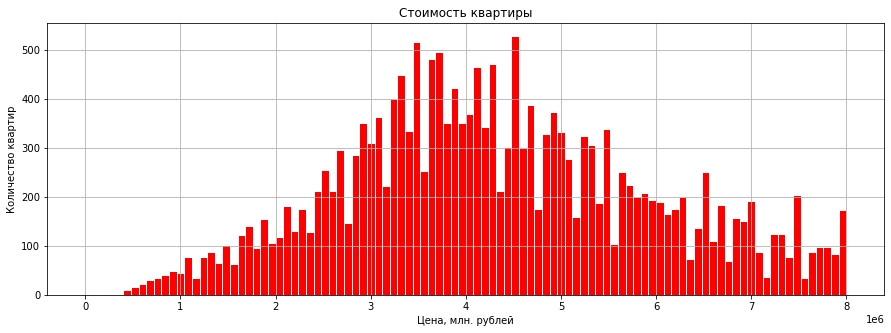

In [82]:
data.hist('last_price', bins=100, range=(0, 8000000),figsize=(15, 5),color='red', grid=True, ec='white' )
plt.title('Стоимость квартиры')
plt.xlabel('Цена, млн. рублей')
plt.ylabel('Количество квартир')
plt.show()

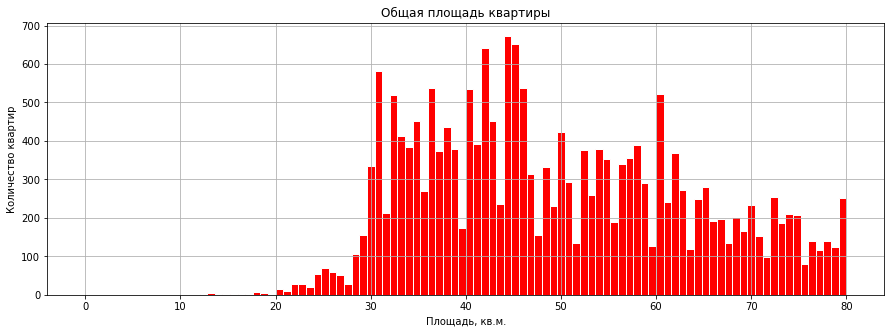

In [83]:
data.hist('total_area_sqm', bins=100, range=(0, 80),figsize=(15, 5),color='red', grid=True, ec='white' )
plt.title('Общая площадь квартиры')
plt.xlabel('Площадь, кв.м.')
plt.ylabel('Количество квартир')
plt.show()

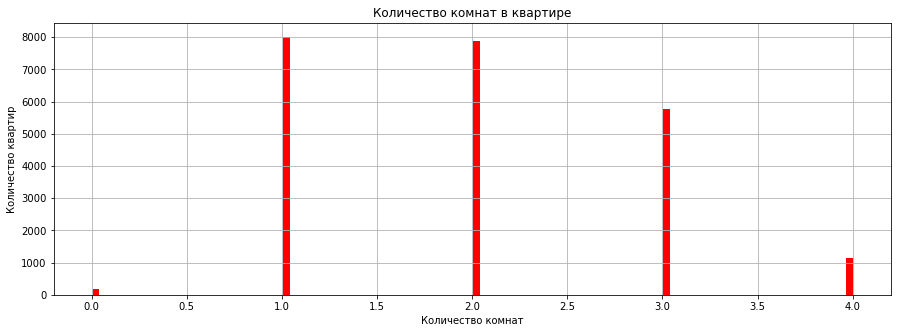

In [84]:
data.hist('rooms_num', bins=100, range=(0, 4),figsize=(15, 5),color='red', grid=True, ec='white' )
plt.title('Количество комнат в квартире')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

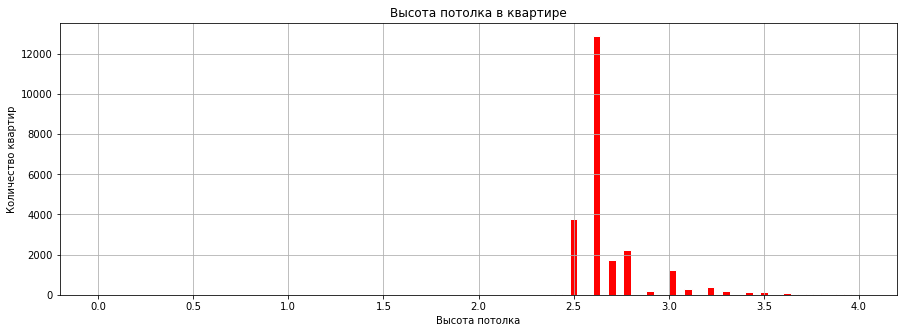

In [85]:
data.hist('ceiling_height_m', bins=100, range=(0, 4),figsize=(15, 5),color='red', grid=True, ec='white' )
plt.title('Высота потолка в квартире')
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')
plt.show()

<span style=color:red>Анализ гистограмм:</span>
Данные гистограммы отлично иллюстируют усредненные показатели по заданным параметрам:
- Стоимость квартиры порядка 46 млн. рублей
- Общая площадь - около 52 кв. метров
- Количество комнат - 2
- Высота потолка - порядка 2,6 метров

___

**Работаем с данными по времени продажи квартир**

In [86]:
# Рассчитаем среднее
data['days_exposition'].mean()

180.7531998045921

Среднее время продажи квартиры - 180 дней (полгода)

In [87]:
# Рассчитаем медиану
data['days_exposition'].median()

95.0

Медианное время продажи квартиры - 95 дней (три месяца)

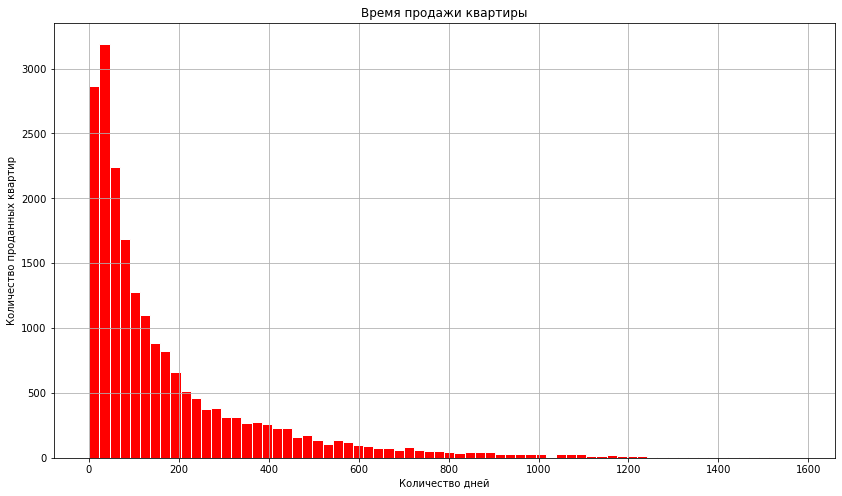

In [88]:
# Создаем  гистограмму
data['days_exposition'].hist(bins=70, figsize=(14,8),ec='white', color='red')
plt.title('Время продажи квартиры')
plt.xlabel('Количество дней')
plt.ylabel('Количество проданных квартир')
plt.show()


<span style=color:red>Анализ гистограммы:</span>
- Большинство квартир продается за 180 - 200 дней
- Диапазон быстрой продажи 20 - 80 дней
- Большинство квартир из категории "проданные максимально быстро" были реализованы в течение 40 - 60 дней
- Есть квартиры, продававшиеся год и более. При определенных условиях такое возможно, однако, можно предположить еще и то, что объявления о продаже не были закрыты после совершения сделки

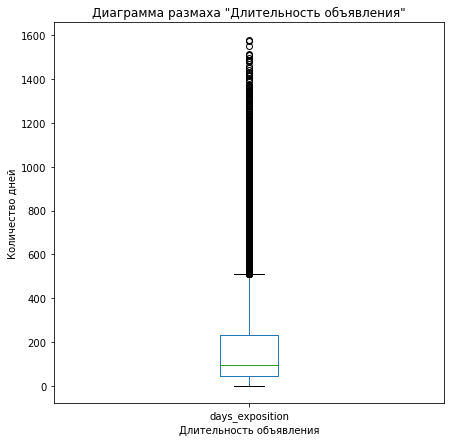

In [89]:
# Строим boxplot для данных значений (без отсечения выбросов / без фильтрации)
data['days_exposition'].plot(kind='box', figsize=(7,7))
plt.title('Диаграмма размаха "Длительность объявления"')
plt.xlabel('Длительность объявления')
plt.ylabel('Количество дней')
plt.show()

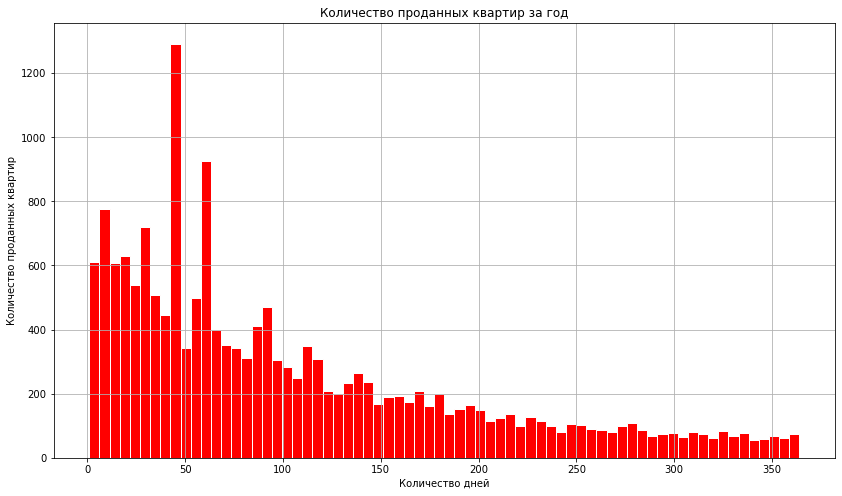

In [90]:
# Отсекаем значения <365, строим гистограмму 
data.query('days_exposition<365')['days_exposition'].hist(bins=70, figsize=(14,8),ec='white', color='red')
plt.title('Количество проданных квартир за год')
plt.xlabel('Количество дней')
plt.ylabel('Количество проданных квартир')
plt.show()

<span style=color:red>Анализ гистограммы:</span>
- Максимально быстро продаются квартиры именно в диапазоне 40 - 60 дней, точнее - 45 дней и 60 дней соответственно
- Интересно, что впервые 10 дней, равно как и через месяц (30 дней) также реализуется довольно много квартир. Возможно, это связано с оформлением кредита или ипотеки (с учетом подготовки всех документов): именно столько банки рассматривают запрос на кредит для заемщиков с положительной историей (примерно 10 дней) и для тех, кто берет кредит первый раз (с учетом оформления документов - порядка одного месяца)

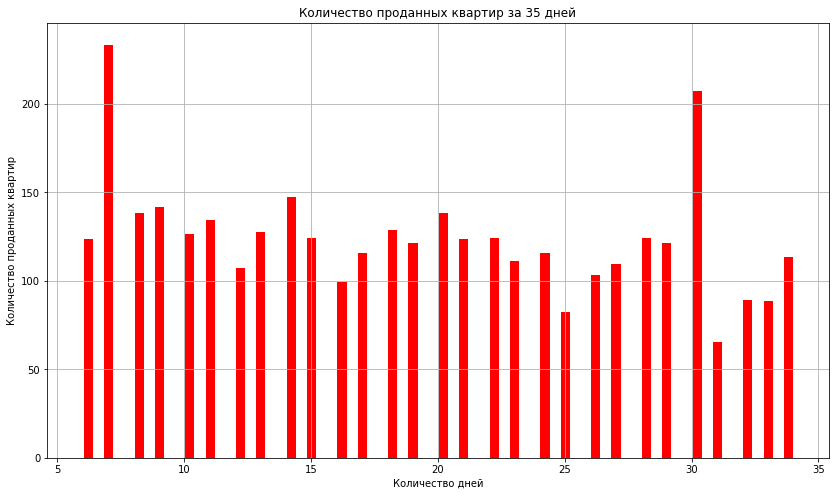

In [91]:
# Посмотрим на диапазон продаж 5 - 35 дней
data.query('5<days_exposition<35')['days_exposition'].hist(bins=70, figsize=(14,8),ec='white', color='red')
plt.title('Количество проданных квартир за 35 дней')
plt.xlabel('Количество дней')
plt.ylabel('Количество проданных квартир')
plt.show()

<span style=color:red>Анализ гистограммы:</span>
- Пик на шестой день. Ситуация, когда все складывается просто великолепно: У покупателя есть деньги, квартира ему полностью подходит, все документы впорядке, вносится задаток, объявление о продаже уже не актуально
- Пик на 30 день. Все тоже самое, но, скажем, на оформление документов нужно чуть больше времени

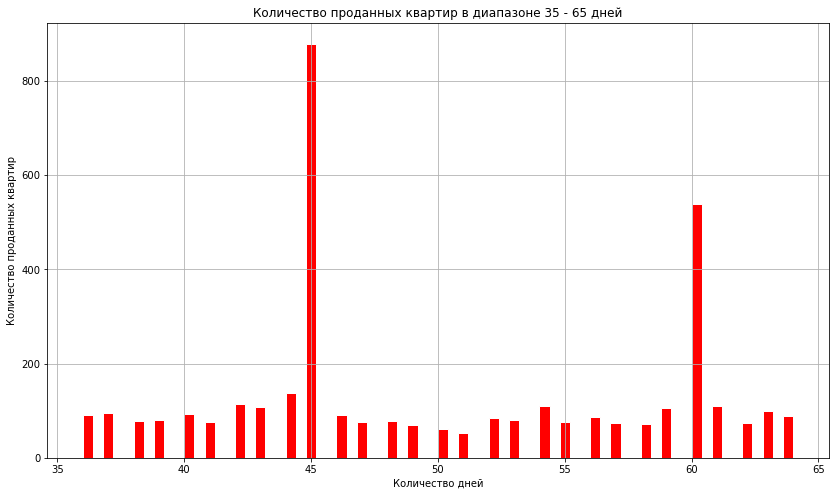

In [92]:
# Посмотрим на диапазон продаж 35 - 65 дней
data.query('35<days_exposition<65')['days_exposition'].hist(bins=70, figsize=(14,8),ec='white', color='red')
plt.title('Количество проданных квартир в диапазоне 35 - 65 дней')
plt.xlabel('Количество дней')
plt.ylabel('Количество проданных квартир')
plt.show()

<span style=color:red>Анализ гистограммы:</span>
- Все-таки, очень странные пики... Может быть, к этим срокам объявления об уже купленных квартирах должны удаляться из базы, но, поскольку это происходит не всегда, именно такие объявления и формируют эти пики. Но, если это так, то...
- ... эти пики должны быть удалены из среза, так как они искажают статистику реально проданных квартир

___

**Анализ корреляции стоимости квартиры от площади, числа комнат и удаленности от центра города**

In [93]:
# Корреляция стоимости квартиры от площади, количества комнат и удаленности от центра
print()
print('Корреляция стоимости квартиры от площади, количества комнат и удаленности от центра')
data_corr=data[['last_price','total_area_sqm','rooms_num','city_center_distance_m']].corr().round(2)
data_corr.style.background_gradient(cmap='coolwarm')



Корреляция стоимости квартиры от площади, количества комнат и удаленности от центра


,last_price,total_area_sqm,rooms_num,city_center_distance_m
last_price,1.000000,0.650000,0.360000,-0.210000
total_area_sqm,0.650000,1.000000,0.760000,-0.230000
rooms_num,0.360000,0.760000,1.000000,-0.180000
city_center_distance_m,-0.210000,-0.230000,-0.180000,1.000000


<span style=color:red>Анализ корреляции</span>
- В целом, коэффициент корреляции незначителен
- Наибольшая корреляция (0,65) присутствует между стоимостью квартиры и общей плодащью
- Количество комнат на стоимость влияет незначительно (0,36)
- Очевидно (и это подтверждается отрицательной корреляцией -0,21), что по мере удаления от центра, цена квартиры снижается

In [94]:
# Для сравнения добавим корреляцию цены квадратного метра от тех же самых параметров
# Корреляция цены квадратного метра от площади, количества комнат и удаленности от центра
print()
print('Корреляция цены квадратного метра от площади, количества комнат и удаленности от центра')
data_corr=data[['sqm_price','total_area_sqm','rooms_num','city_center_distance_m']].corr().round(2)
data_corr.style.background_gradient(cmap='coolwarm')


Корреляция цены квадратного метра от площади, количества комнат и удаленности от центра


,sqm_price,total_area_sqm,rooms_num,city_center_distance_m
sqm_price,1.000000,0.300000,0.060000,-0.320000
total_area_sqm,0.300000,1.000000,0.760000,-0.230000
rooms_num,0.060000,0.760000,1.000000,-0.180000
city_center_distance_m,-0.320000,-0.230000,-0.180000,1.000000


<span style=color:red>Анализ корреляции:</span>
Коэффициент корреляции снизился, но общая закономерность осталась неизменной

___

**Анализ корреляции стоимости квартиры от даты публикации и этажа**

In [95]:
def date_price(data, ylims=None):
    date_to_plot = ['weekday_name', 'month', 'year']
    titles = ['Средняя цена по дню недели', 'Средняя цена по месяцу', 'Средняя цена по году']

    for i in range(len(date_to_plot)):
        df_to_plot = data.groupby(date_to_plot[i]).mean()['last_price'].reset_index().sort_values(by=date_to_plot[i])
        if ylims is None:
            plot = df_to_plot.plot(x=date_to_plot[i], y="last_price", kind='bar', figsize=(15,7.5), ec='black',
                                   color='red',legend=False, title=titles[i])
        else:
            plot = df_to_plot.plot(x=date_to_plot[i], y="last_price", kind='bar', figsize=(15,7.5), ec='black',
                               color='red',legend=False, title=titles[i], fontsize=15, ylim=ylims[i])
      
      
      

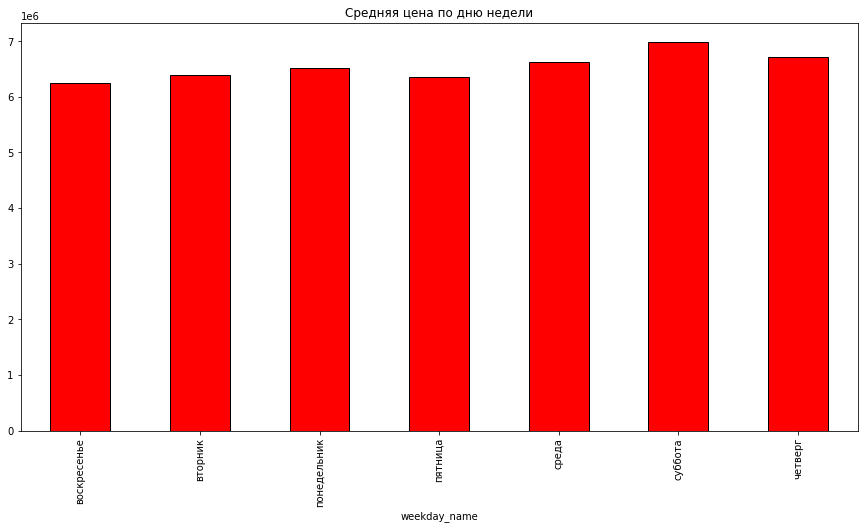

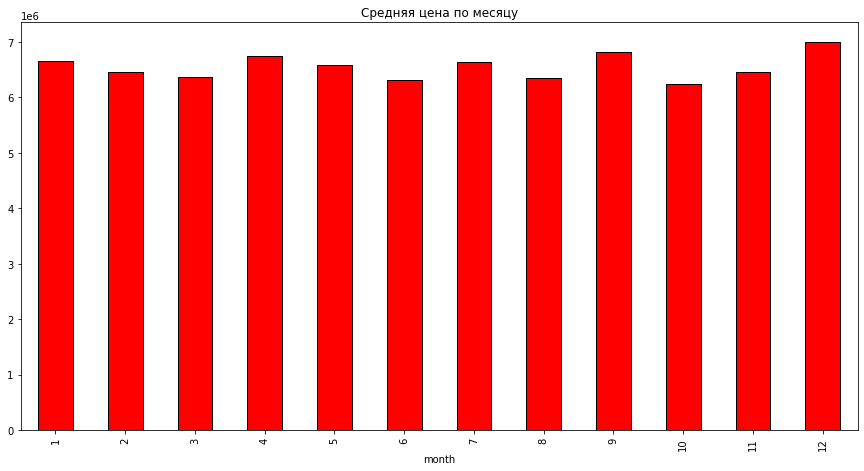

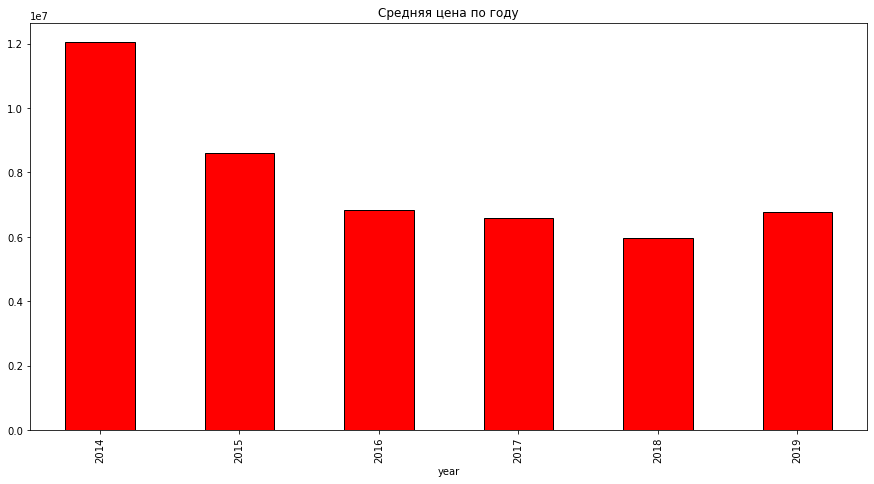

In [96]:
date_price(data)

<span style=color:red>Анализ гистограммы:</span> 
- Стоимость квартиры никак не зависит от дня публикации объявления. Можно отметить, что стоимость квартир, выставленных на продажу во вторник и в субботу чуть выше
- В марте, апреле, августе и декабре на продажу выставляются более дорогие квартиры, чем другие месяцы. В июне и июле стоимость квартир, выставленных на продажу ниже других
- В 2014 году объявлений было больше, а вот в 2017 - наоборот. Можно посмотреть эти годы по месяцам для более детального анализа ситуации

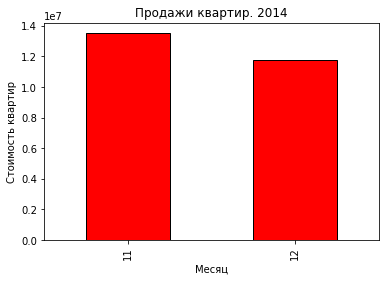

In [97]:
# Создаем срез по 2014 году и строим гистограмму по месяцам
year_2014=(
data
    .query('year==2014')
    .pivot_table(index='year', columns='month', values='last_price')
    .round(1)
    .median()
    .plot(x='month', y='last_price', kind='bar', ec='black', color='red')
)
plt.title('Продажи квартир. 2014')
plt.xlabel('Месяц')
plt.ylabel('Стоимость квартир')
plt.show()



<span style=color:red>Анализ гистограммы:</span> 
- Во-первых, в 2014 году лишь два последних месяца содержат записи об объявлениях
- В ноябре 2014 года стоимость квартир, выставленных на продажу была выше, чем в декабре
- В декабре 2014 года наметился спад, что характерно для последнего месяца в году вообще
- Также можно предположить, что именно в этот период проявились первые ощутимые результаты экономического кризиса (санкции - контрсанкции) и это также сказалось рынке недвижимости

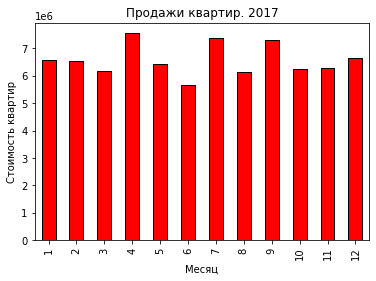

In [98]:
# Создаем срез по 2017 году и строим гистограмму по месяцам
year_2017=(
data
    .query('year==2017')
    .pivot_table(index='year', columns='month', values='last_price')
    .round(1)
    .median()
    .plot(x='month', y='last_price', kind='bar', ec='black', color='red')
)
plt.title('Продажи квартир. 2017')
plt.xlabel('Месяц')
plt.ylabel('Стоимость квартир')
plt.show()

<span style=color:red>Анализ гистограммы:</span> 
- В 2017 году, несмотря на общий спад, ситуация стабилизировалась
- Наиболее дорогие квартиры выствлялись на продажу в 2017 году в апреле (весна - традиционно горячая пора для риэлторов)

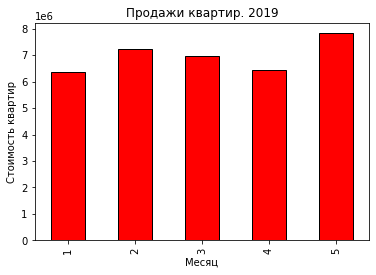

In [99]:
# Для полноты картины, создаем срез по 2019 году и строим гистограмму по месяцам
year_2017=(
data
    .query('year==2019')
    .pivot_table(index='year', columns='month', values='last_price')
    .round(1)
    .median()
    .plot(x='month', y='last_price', kind='bar', ec='black', color='red')
)
plt.title('Продажи квартир. 2019')
plt.xlabel('Месяц')
plt.ylabel('Стоимость квартир')
plt.show()

<span style=color:red>Анализ гистограммы:</span> 
- Лишь пять месяцев 2019 года охвачены датасетом
- На этот раз, лидирует май

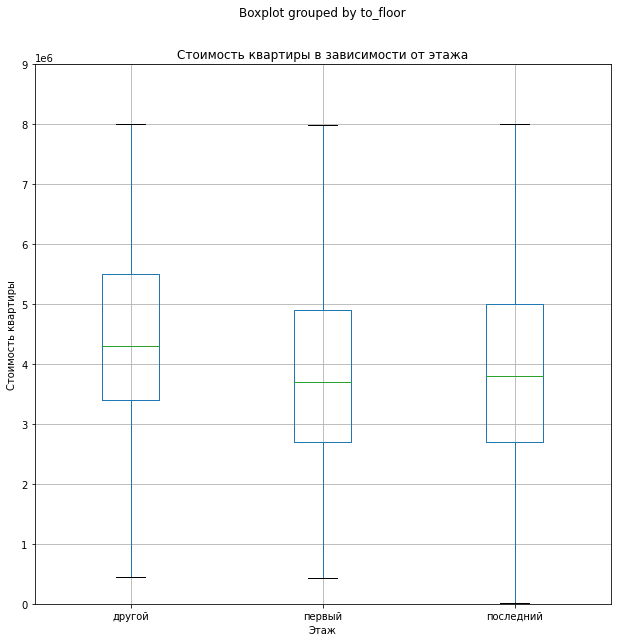

In [100]:
# Создаем boxplot по этажам
plot=data.query('0<last_price<8000000').boxplot('last_price', by='to_floor', figsize=(10,10)).set_ylim(0, 9000000)
plt.title('Стоимость квартиры в зависимости от этажа')
plt.xlabel('Этаж')
plt.ylabel('Стоимость квартиры')
plt.show()

<span style=color:red>Анализ гистограммы:</span> 
- Квартиры на первом этаже стоят дешевле остальных
- Квартиры на последнем этаже стоят дороже тех, что на первом, но дешевле тех, что на любом другом
- Квартиры, расположенные на втором и последующих этажах стоят дороже тех, что на первом и на последнем

___

**Работаем с топ-10 населенными пунктами по числу объявлений. Вычисляем цену квадратного метра; находим среди них населенные пункты с самой высокой и самой низкой стоимостью жилья**

In [101]:
# Выводим топ-10 населенных пунктов по числу объявлений
data['location_name'].value_counts().head(10)

санкт-петербург      15721
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: location_name, dtype: int64

In [131]:
# Рассчитываем среднюю цену за квадратный метр в топ_10 
# Вычисляем населенные пункты с самой высокой и самой низкой стоимостью жилья
# Используем для этих целей frame
top10 = data['location_name'].value_counts().index.tolist()[:10]
top10_sqm_price = [data[data['location_name'] == location]['sqm_price'].median().round(2) for location in top10]
top10_prices = [data[data['location_name'] == location]['last_price'].median() for location in top10]
frame = {'Город': top10, 'Средняя цена за кв.м., тыс. руб.': top10_sqm_price, 'Средняя цена за квартиру,  млн. руб.': top10_prices}
dataframe = pd.DataFrame(frame).sort_values(by='Средняя цена за кв.м., тыс. руб.', ascending=False)
dataframe

AttributeError: 'float' object has no attribute 'round'

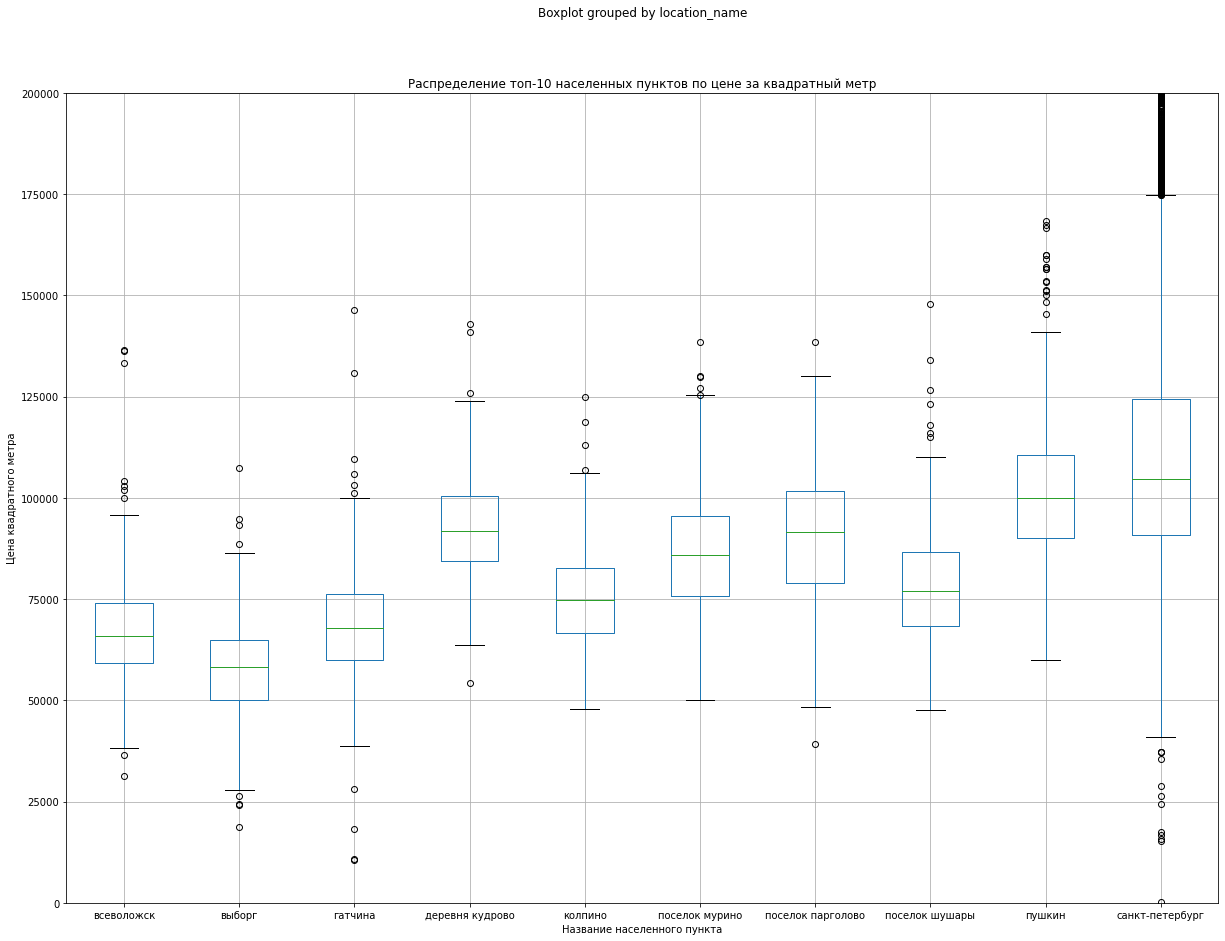

In [106]:
import warnings

warnings.filterwarnings('ignore')

# Создаем boxplot с распределением топ-10 населенных пунктов по цене за квадратный метр
plot = (data[data.location_name.isin(top10)]
    .boxplot('sqm_price', by='location_name',figsize=(20,15))
    .set_ylim(0,200000)
       )
plt.title('Распределение топ-10 населенных пунктов по цене за квадратный метр')
plt.xlabel('Название населенного пункта')
plt.ylabel('Цена квадратного метра')
plt.show()

<span style=color:red>Анализ полученных данных:</span>
- В десяти населенных пунктах (Санкт-Петербург и Ленинградская область) цена за квадратный метр жилплощади колеблется в диапазоне от 105 тыс. рублей (Санкт-Петербург) до 58 тыс. рублей (Выборг)
- Наиболее дорогая жилплощадь в Санкт-Петербурге и городе Пушкин
- Минимальные цены на недвижимость в Выборге (по сравнению с Санкт-Петербургом цены ниже практически в два раза)

___

**Изучение предложений по квартирам в зависимости от удаленности от центра**


In [107]:
# Выбираем квартиры в Санкт-Петербурге
data_spb = data.query('location_name == "санкт-петербург"')

# Формируем столбец с расстояниями в километрах; округляем до целых
data_spb.loc[:, 'city_center_distance_km'] = (data_spb.loc[:, 'city_center_distance_m']/1000).round()

# Выводим первые десять значений
data_spb.head(10)

,total_images,last_price,total_area_sqm,first_day_exposition,rooms_num,ceiling_height_m,total_floors_num,living_area_sqm,curr_floor,is_apartment,is_studio,is_open_plan,kitchen_area_sqm,balconies_num,location_name,nearest_airport_distance_m,city_center_distance_m,parks_num_3km,nearest_park_distance_m,ponds_num_3km,nearest_ponds_distance_m,days_exposition,sqm_price,weekday_name,month,year,to_floor,living_area_ratio,kitchen_area_ratio,city_center_distance_km
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,четверг,3,2019,другой,0.47,0.23,16.0
2,10,5196000.0,56.0,2015-08-20,2,2.6,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,четверг,8,2015,другой,0.61,0.15,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.6,14,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,пятница,7,2015,другой,NaN,NaN,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,вторник,6,2018,другой,0.32,0.41,8.0
7,5,7915000.0,71.6,2019-04-18,2,2.6,24,NaN,22,False,False,False,18.9,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544,четверг,4,2019,другой,NaN,0.26,12.0
9,18,5400000.0,61.0,2017-02-26,3,2.5,9,43.6,7,False,False,False,6.5,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524,воскресенье,2,2017,другой,0.71,0.11,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.7,12,20.3,3,False,False,False,8.5,0,санкт-петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525,четверг,11,2017,другой,0.51,0.21,14.0
15,16,4650000.0,39.0,2017-11-18,1,2.6,14,20.5,5,False,False,False,7.6,1,санкт-петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0,119230,суббота,11,2017,другой,0.53,0.19,14.0
16,11,6700000.0,82.0,2017-11-23,3,3.0,5,55.6,1,False,False,False,9.0,0,санкт-петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,81707,четверг,11,2017,первый,0.68,0.11,11.0
17,6,4180000.0,36.0,2016-09-09,1,2.6,17,16.5,7,False,False,False,11.0,1,санкт-петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571.0,116111,пятница,9,2016,другой,0.46,0.31,15.0


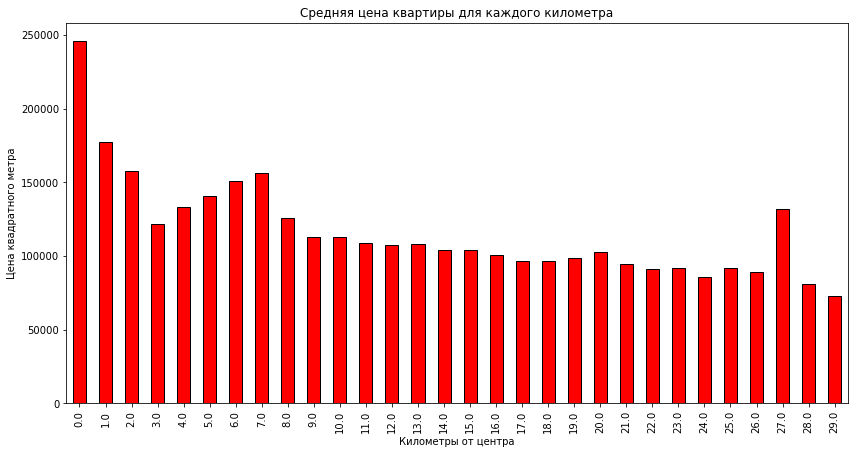

In [108]:
# Подсчитываем среднюю цену для каждого километра; строим график зависимости цены от удаления от центра
data_spb.groupby('city_center_distance_km').agg({'sqm_price':'mean'}).sort_values(by='city_center_distance_km').\
plot(kind = 'bar',figsize = (14,7),ec='black', color='red', legend=False,)
                                                                                                                   
plt.title('Средняя цена квартиры для каждого километра')
plt.xlabel('Километры от центра')
plt.ylabel('Цена квадратного метра')
plt.show()

<span style=color:red>Анализ графика:</span>
- В самом центре (по всемй видимости, имеется ввиду непосредственно исторический центр города) средняя цена за квадратный метр переваливает за 200000 рублей
- На расстоянии одного километра цена за квадратный метр снижается 170 - 180 тысяч рублей
- Примечательно, что цена квадрата на удалении трех километров от центра аналогична цене квадратного метра на расстоянии 8 километров. Можно предположить, что на расстоянии три километра от центра в Санкт-Петербурге есть как престижные районы, так и зоны застройки не пользующиеся (в силу тех или иных причин) повышенным спросом
- Судя по графику, центр города (**центральная зона**) ограничен 7 - 8 километрами: после восьми километров начинается снижение цены за квадратный метр
- На удалении 27 километров цена квадратного метра резко идет вверх - возможно, это элитная приморская недвижимость 

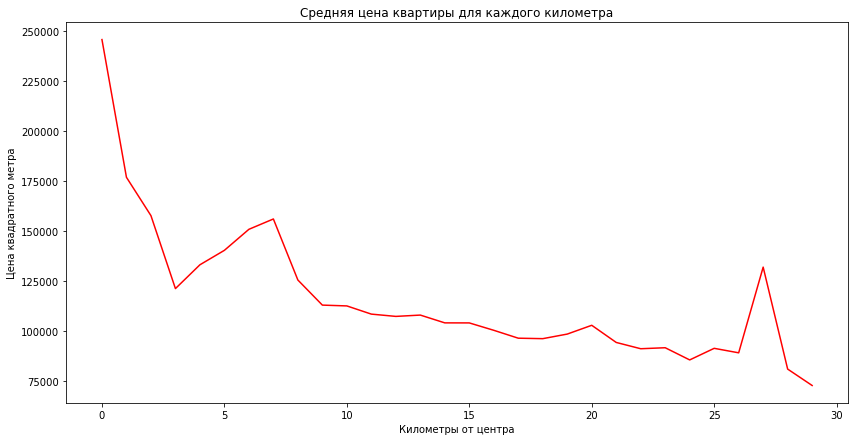

In [109]:
# Подсчитываем среднюю цену для каждого километра; строим график зависимости цены от удаления от центра
data_spb.groupby('city_center_distance_km').agg({'sqm_price':'mean'}).sort_values(by='city_center_distance_km')\
.plot(figsize = (14,7), color='red',legend=False,)
plt.title('Средняя цена квартиры для каждого километра')
plt.xlabel('Километры от центра')
plt.ylabel('Цена квадратного метра')
plt.show()

___

**Анализ сегмента квартир в центре города**

In [110]:
# Создаем срез по квартирам в центральной зоне
data_spb_center = data_spb.query('city_center_distance_km<=7')

# Узнаем количество квартир в этой выборке
print('Количество квартир в центральной зоне:', data_spb_center.shape[0])
    

Количество квартир в центральной зоне: 3525


In [111]:
data_spb_center.describe()

,total_images,last_price,total_area_sqm,rooms_num,ceiling_height_m,total_floors_num,living_area_sqm,curr_floor,kitchen_area_sqm,balconies_num,nearest_airport_distance_m,city_center_distance_m,parks_num_3km,nearest_park_distance_m,ponds_num_3km,nearest_ponds_distance_m,days_exposition,sqm_price,month,year,living_area_ratio,kitchen_area_ratio,city_center_distance_km
count,3525.000000,3.525000e+03,3525.000000,3525.000000,3525.000000,3525.000000,3227.000000,3525.000000,3187.000000,3525.000000,3519.000000,3525.000000,3525.000000,2343.000000,3525.000000,2554.000000,2941.000000,3.525000e+03,3525.000000,3525.000000,3227.000000,3187.000000,3525.000000
mean,10.212482,1.489553e+07,93.168681,2.834326,2.937362,7.103830,54.486582,4.199433,14.528867,0.320567,24665.336459,4527.910638,1.039149,461.517712,1.296738,464.063821,247.676641,1.452276e+05,6.427518,2017.171064,0.581695,0.173144,4.499858
std,6.004866,2.432091e+07,59.473565,1.449808,0.744901,3.841422,37.274347,2.951404,9.192549,0.755937,4014.821552,1659.986983,0.945537,308.216168,1.091138,271.348372,273.540907,9.362387e+04,3.453384,1.125225,0.116051,0.083068,1.688014
min,0.000000,1.600000e+06,12.000000,0.000000,2.400000,2.000000,2.000000,1.000000,2.000000,0.000000,12430.000000,181.000000,0.000000,9.000000,0.000000,22.000000,3.000000,1.534500e+04,1.000000,2014.000000,0.020000,0.030000,0.000000
25%,6.000000,6.690000e+06,57.000000,2.000000,2.600000,5.000000,31.200000,2.000000,9.000000,0.000000,21869.000000,3501.000000,0.000000,272.000000,0.000000,226.250000,60.000000,1.000000e+05,3.000000,2017.000000,0.510000,0.120000,4.000000
50%,10.000000,9.200000e+06,78.700000,3.000000,2.800000,6.000000,46.000000,4.000000,12.000000,0.000000,24298.000000,4728.000000,1.000000,426.000000,1.000000,454.500000,142.000000,1.236220e+05,6.000000,2017.000000,0.600000,0.150000,5.000000
75%,15.000000,1.450000e+07,110.000000,3.000000,3.200000,9.000000,66.500000,5.000000,17.000000,0.000000,26989.000000,5768.000000,2.000000,592.000000,2.000000,665.000000,346.000000,1.558130e+05,10.000000,2018.000000,0.660000,0.210000,6.000000
max,50.000000,7.630000e+08,631.200000,19.000000,32.000000,25.000000,409.000000,25.000000,107.000000,5.000000,39763.000000,7498.000000,3.000000,2295.000000,3.000000,1293.000000,1572.000000,1.907500e+06,12.000000,2019.000000,0.980000,0.640000,7.000000


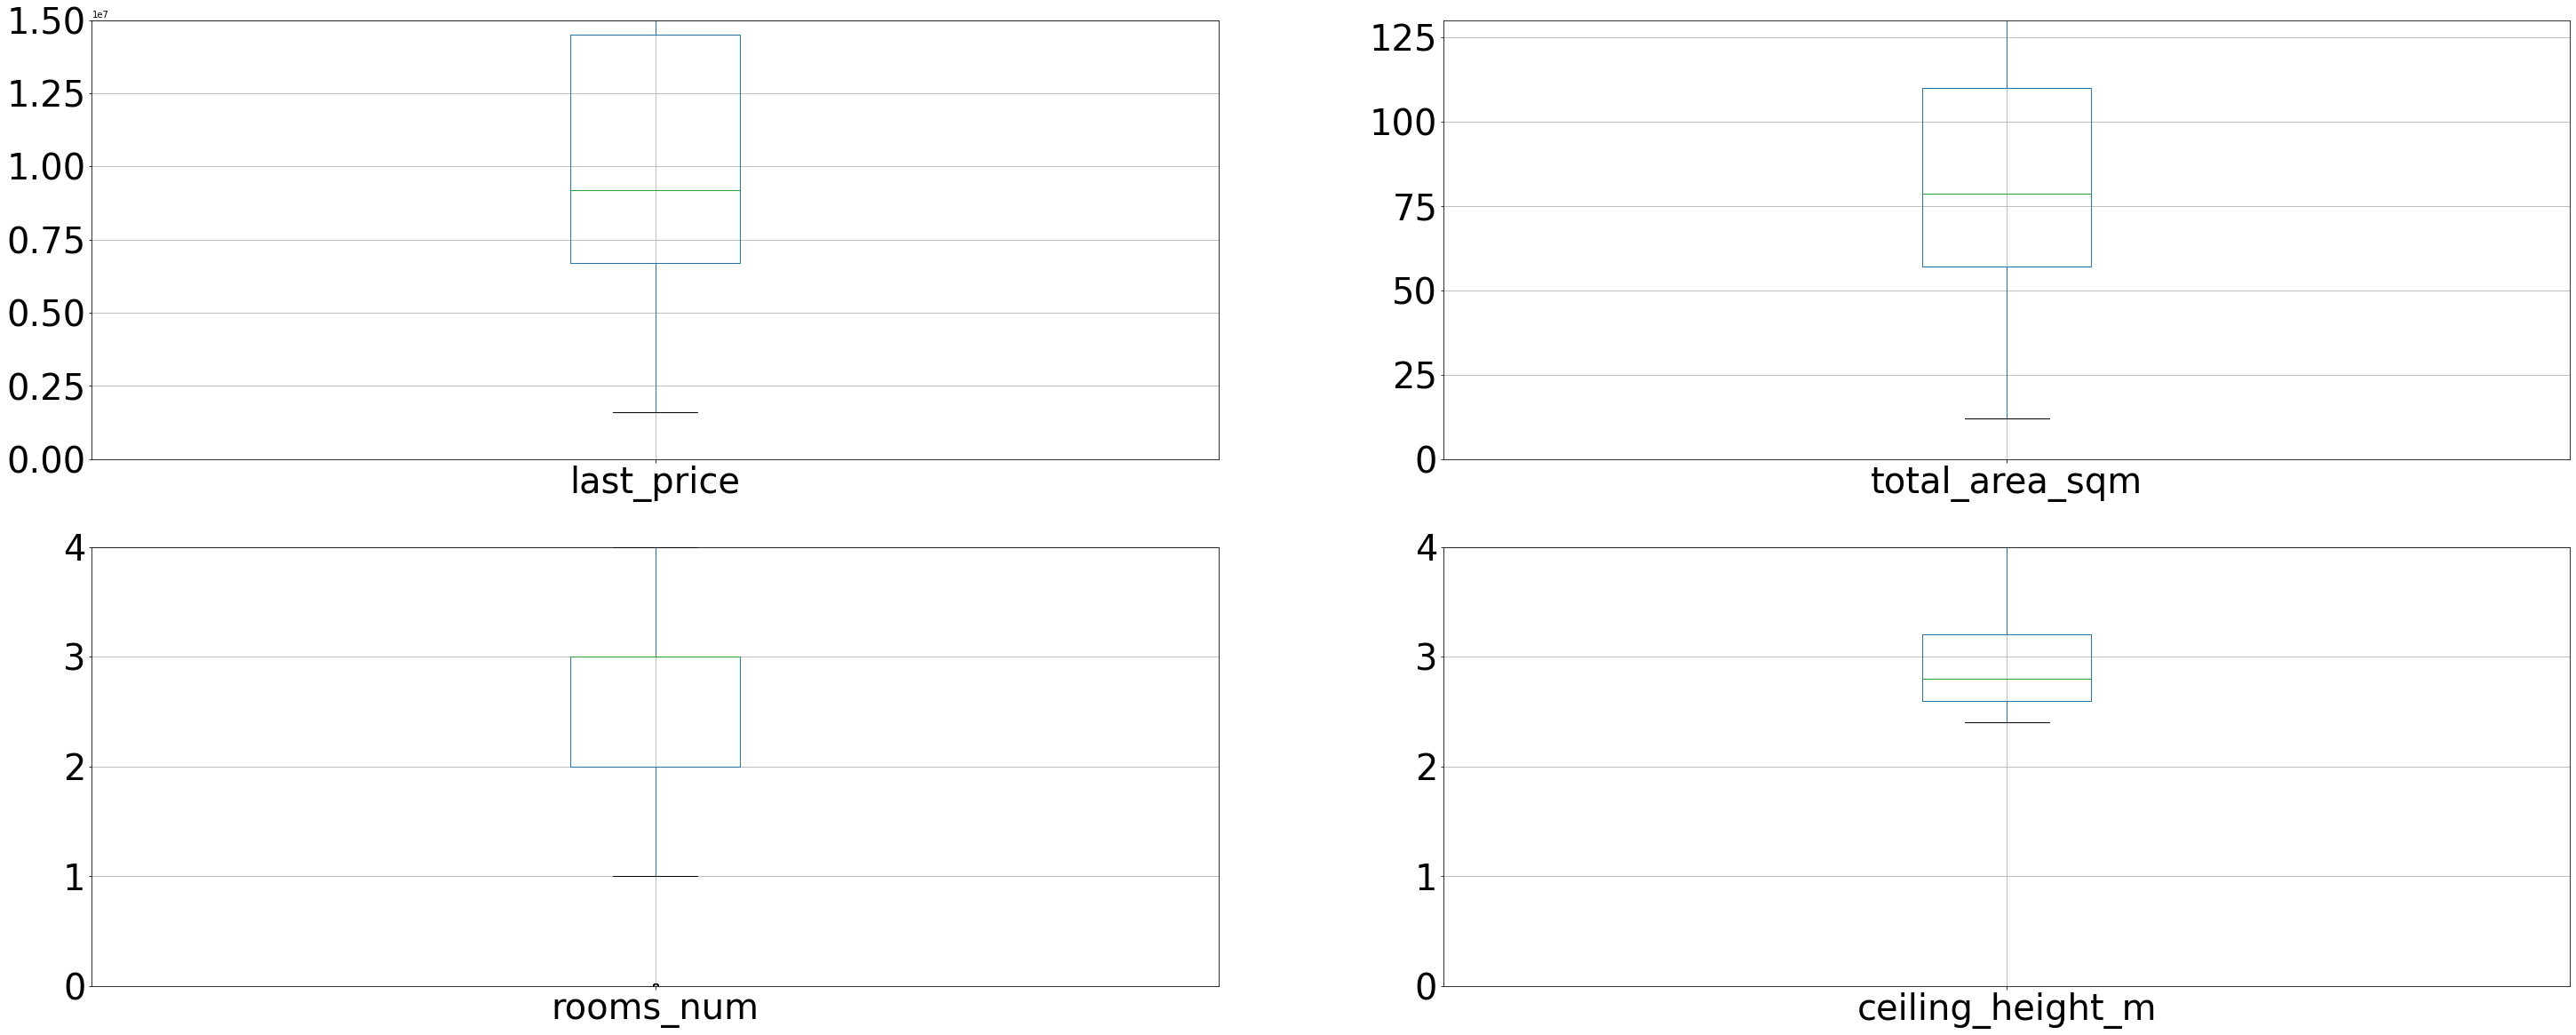

In [112]:
# Строим гистограммы для каждого параметра
# Определяем лимиты немногим больше Q3
rows=2
cols=2
fig, axes=plt.subplots(rows, cols, figsize=(50,20))
box_list=['last_price','total_area_sqm','rooms_num', 'ceiling_height_m']
ylims=[15000000,130,4,4]
count=0
for r in range(rows):
    for c in range(cols):
        ax = data_spb_center.boxplot(column=box_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1

<span style=color:red>Анализ гистограмм:</span>
Расположение квартиры в центральной зоне объективно влияет на заданные параметры
- Средняя цена возрастает до 92 млн. рублей
- Общая площадь увеличивается до 78 кв. метров
- Число комнат возрастает до трех
- Высота потолка (2,8 метра) хоть и незначительно, но также увеличивается

**Выделение дополнительных факторов, влияющих на стоимость квартиры**

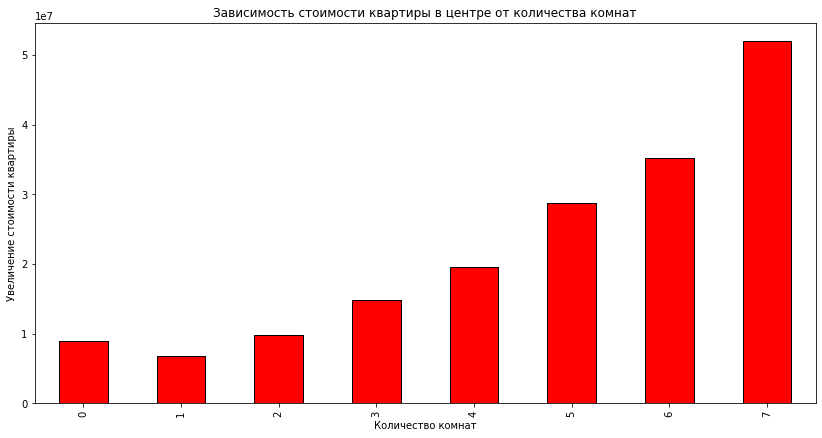

In [113]:
# Зависимость стоимости квартиры в центре от количества комнат
# Количество комнат ограничим семью (7)
data_spb_center.query('rooms_num<=7').groupby('rooms_num').agg({'last_price':'mean'}).\
sort_values(by='rooms_num').\
plot(kind = 'bar', figsize = (14,7),ec='black', color='red', legend=False)
plt.title('Зависимость стоимости квартиры в центре от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Увеличение стоимости квартиры')
plt.show()

<span style=color:red>Анализ графика:</span>
- Чем больше комнат, тем больше цена
- Цена студии или openspace в центре города выше, чем цена однокомнатной квартиры

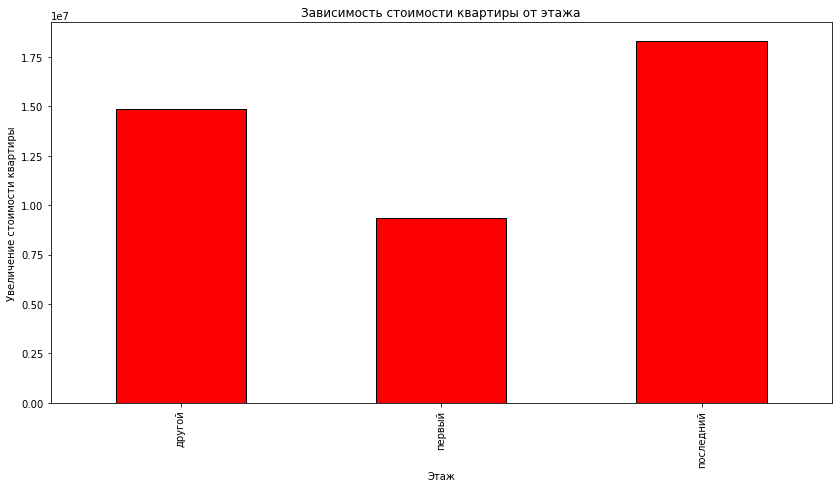

In [114]:
# Зависимость стоимости квартиры в центре от этажа
data_spb_center.groupby('to_floor').agg({'last_price':'mean'}).\
sort_values(by='to_floor').\
plot(kind = 'bar', figsize = (14,7),ec='black', color='red', legend=False,)
plt.title('Зависимость стоимости квартиры от этажа')
plt.xlabel('Этаж')
plt.ylabel('Увеличение стоимости квартиры')
plt.show()

<span style=color:red>Анализ графика:</span>
- Квартира на первом этаже даже в центре города стоит дешевле
- Интересно, что квартира на последнем этаже, но в пределах центральной зоны стоит дороже, чем квартира на любом другом этаже... Притягательная сила и поэзия питерских крыш влияет на ценообразвание?

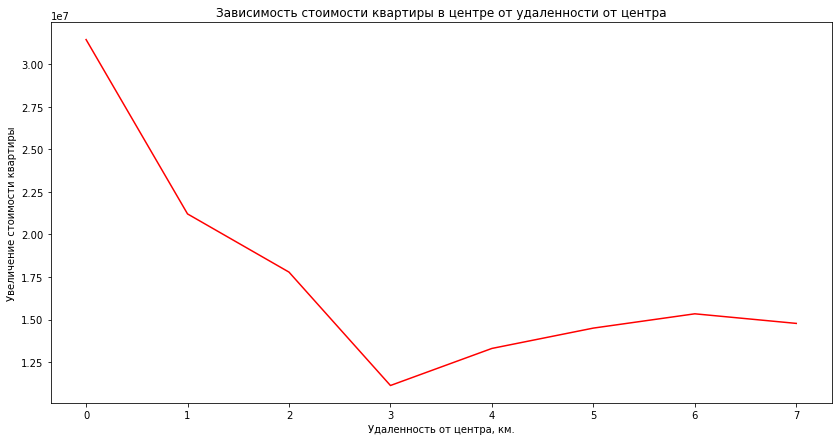

In [115]:
# Зависимость стоимости квартиры от удаленности от центра
data_spb_center.query('city_center_distance_km<=7').groupby('city_center_distance_km').\
agg({'last_price':'mean'}).sort_values(by='city_center_distance_km').\
plot(figsize = (14,7), color='red',legend=False,)
plt.title('Зависимость стоимости квартиры в центре от удаленности от центра')
plt.xlabel('Удаленность от центра, км.')
plt.ylabel('Увеличение стоимости квартиры')
plt.show()

<span style=color:red>Анализ графика:</span>
- Очевидно: чем дальше от центра, тем дешевле

In [116]:
def date_price_center(data, ylims=None):
    date_to_plot = ['weekday_name', 'month', 'year']
    titles = ['Средняя цена в центре по дню недели', 'Средняя цена в центре по месяцу', 'Средняя цена в центре по году']

    for i in range(len(date_to_plot)):
        df_to_plot = data_spb_center.groupby(date_to_plot[i]).mean()['last_price'].reset_index().sort_values(by=date_to_plot[i])
        if ylims is None:
            plot = df_to_plot.plot(x=date_to_plot[i], y="last_price", kind='bar', figsize=(15,7.5), ec='black',
                                   color='red',legend=False, title=titles[i])
        else:
            plot = df_to_plot.plot(x=date_to_plot[i], y="last_price", kind='bar', figsize=(15,7.5), ec='black',
                               color='red',legend=False, title=titles[i], fontsize=15, ylim=ylims[i])
       
      

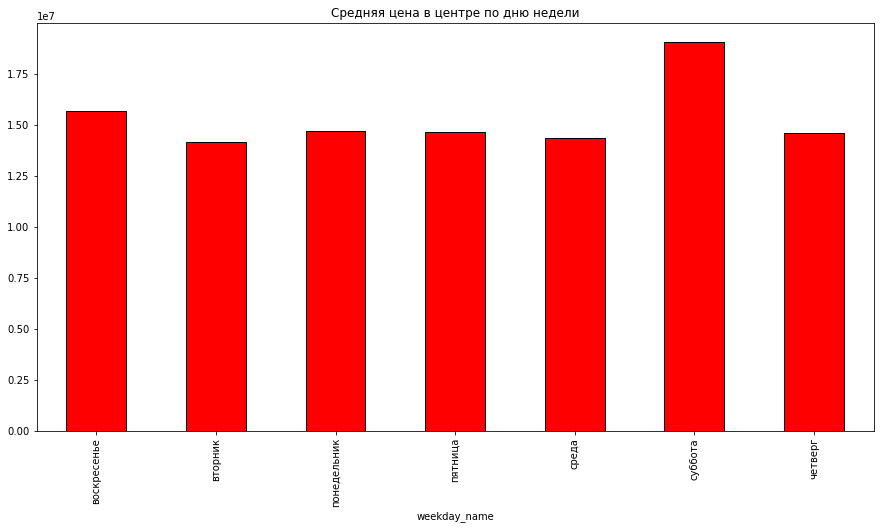

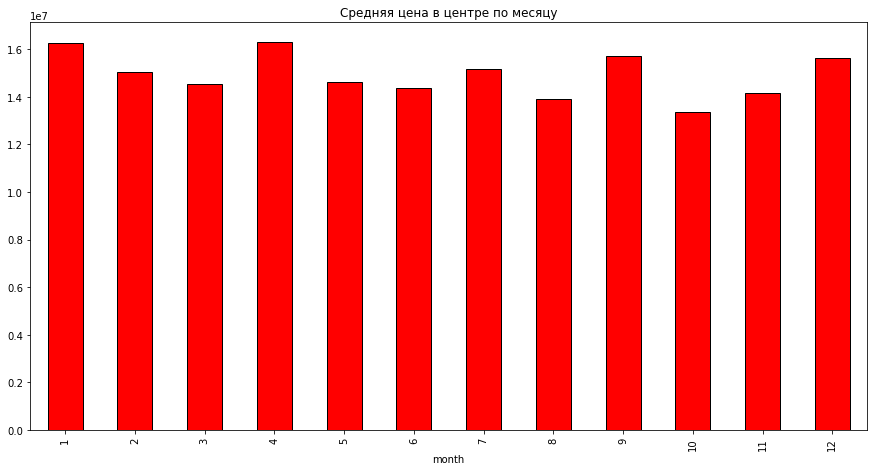

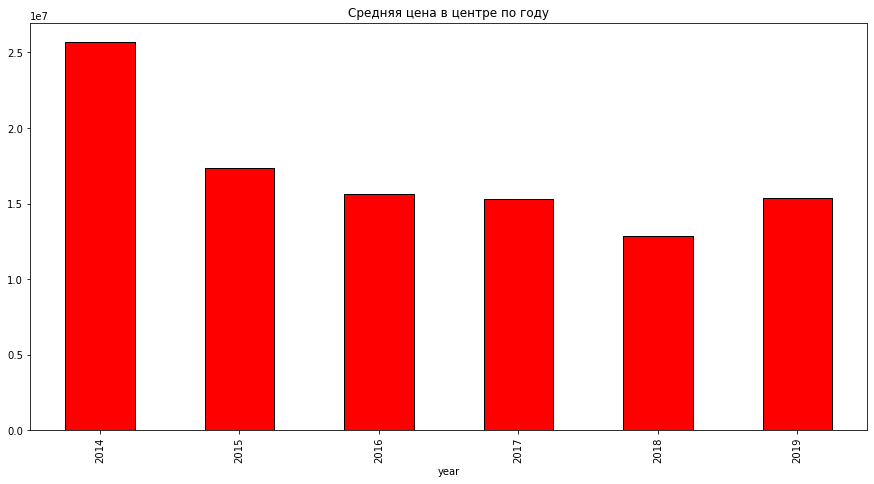

In [117]:
date_price_center(data_spb_center)

<span style=color:red>Анализ графиков:</span>
По сути, данные графики практически полностью повторяют графики для аналогичных параметров (день недели, месяц и год публикации) для всего датасета

### *Промежуточный вывод* (3)

На стоимость квартир в центральной зоне существенное влияние оказывают следующие факторы:
- Общая площадь
- Количество комнат
- Высота потолков
- Близость к историчекому центру города (0 -2 км)

Незначительно влияет также фактор этажа: квартиры на ВСЕХ этажах, кроме первого стоят дороже

Дата публикации объявления на стоимость квартиры в ценральной зоне не влияет

**Проверим корректность выводов с помощью корреляции**

In [118]:
# Корреляция стоимости квартиры в центральной зоне от площади, количества комнат, высоты потолков и удаленности от центра
print('Корреляция стоимости квартиры в центральной зоне от исследуемых параметров')
data_spb_center_corr=data_spb_center[['last_price','total_area_sqm','rooms_num','ceiling_height_m','city_center_distance_m']].corr().round(2)
data_spb_center_corr.style.background_gradient(cmap='coolwarm')

Корреляция стоимости квартиры в центральной зоне от исследуемых параметров


,last_price,total_area_sqm,rooms_num,ceiling_height_m,city_center_distance_m
last_price,1.000000,0.610000,0.310000,0.070000,-0.040000
total_area_sqm,0.610000,1.000000,0.730000,0.130000,-0.090000
rooms_num,0.310000,0.730000,1.000000,0.100000,-0.170000
ceiling_height_m,0.070000,0.130000,0.100000,1.000000,-0.120000
city_center_distance_m,-0.040000,-0.090000,-0.170000,-0.120000,1.000000


**Корреляционная матрица подтверждает выводы на основе проведенного анализа**

___

**Сравним корреляционные матрицы:**

In [119]:
# Общие данные
print('Сравнение корреляционных матриц:')
print('Корреляция по общим данным')
data_corr=data[['last_price','total_area_sqm','rooms_num','ceiling_height_m','city_center_distance_m']].corr().round(2)
data_corr.style.background_gradient(cmap='coolwarm')

Сравнение корреляционных матриц:
Корреляция по общим данным


,last_price,total_area_sqm,rooms_num,ceiling_height_m,city_center_distance_m
last_price,1.000000,0.650000,0.360000,0.060000,-0.210000
total_area_sqm,0.650000,1.000000,0.760000,0.080000,-0.230000
rooms_num,0.360000,0.760000,1.000000,0.050000,-0.180000
ceiling_height_m,0.060000,0.080000,0.050000,1.000000,-0.070000
city_center_distance_m,-0.210000,-0.230000,-0.180000,-0.070000,1.000000


In [120]:
# Центральная зона
print('Корреляция по центральное зоне')
data_spb_center_corr=data_spb_center[['last_price','total_area_sqm','rooms_num','ceiling_height_m','city_center_distance_m']].corr().round(2)
data_spb_center_corr.style.background_gradient(cmap='coolwarm')

Корреляция по центральное зоне


,last_price,total_area_sqm,rooms_num,ceiling_height_m,city_center_distance_m
last_price,1.000000,0.610000,0.310000,0.070000,-0.040000
total_area_sqm,0.610000,1.000000,0.730000,0.130000,-0.090000
rooms_num,0.310000,0.730000,1.000000,0.100000,-0.170000
ceiling_height_m,0.070000,0.130000,0.100000,1.000000,-0.120000
city_center_distance_m,-0.040000,-0.090000,-0.170000,-0.120000,1.000000


<span style=color:red>Сравнение корреляционных матриц:</span>
Независимо от места расположения квартиры, на ее стоимость, прежде всего влияет общая площадь и количество комнат, а также удаленность от центра города

___

**Перед тем как сформулировать общий вывод, стоит рассмотреть обобщенную корреляционную матрицу по всем параметрам. Возможно, в ней проявятся новые закономерности.**

Обобщенная корреляционная матрица. "Тепловая карта"


<AxesSubplot:>

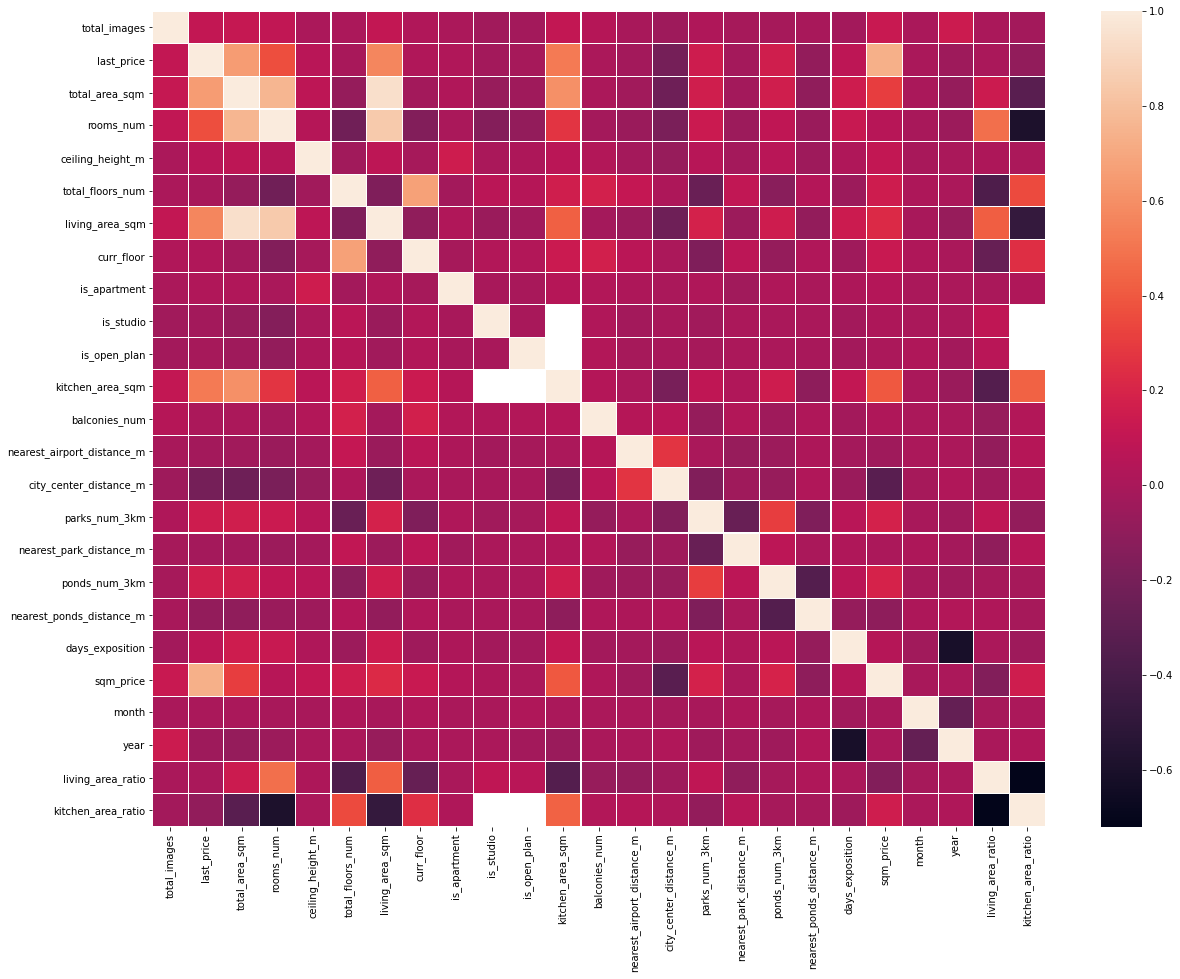

In [121]:
# Импортируем библиотеку seaborn для создания тепловой карты
# Создаем тепловую карту датасета
import seaborn as sns
print('Обобщенная корреляционная матрица. "Тепловая карта"')
corr = data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=.1)
           

Обобщенная корреляция (тепловая карта) по столбцу "Стоимость квартиры"


<AxesSubplot:>

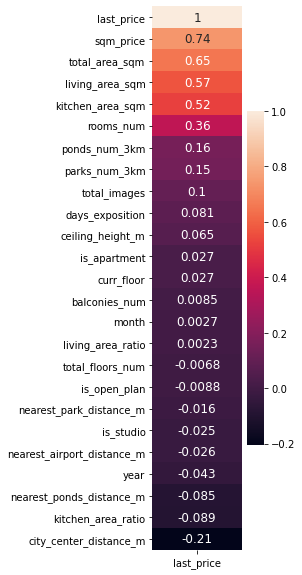

In [122]:
# Выводим тепловую карту для столбца 'last_price'
print('Обобщенная корреляция (тепловая карта) по столбцу "Стоимость квартиры"')
plt.figure(figsize=(2,10))
sns.heatmap(data.corr()[['last_price']].sort_values(by='last_price', ascending=False), 
            annot=True, annot_kws={'size':12})

### *Промежуточные выводы* (4)

Обобщенная корреляционая матрица показала следующее:
- Очевидно, что самая сильная корреляция (0,74) между стоимостью квартиры и ценой за квардатный метр
- Второй по значимости фактор, влияющий на стоимость квартиры - общая площадь (0,65)
- На третьем и четвертом месте идут жилая площадь (0,57) и площадь кухни (0,52)
- Количество комнат влияет на стоимость квартиры, однако это влияние нельзя назвать значительным (0,36)
- Остальные параметры  либо никак не влияют на стоимость квартиры, либо коррелируют отрицательно (например, удаленность от центра города с коэффициентом -0,21) 


### **Дополнительно. Удаление редких значений и выбросов**

In [123]:
pure_data = {'total_area_sqm', 'last_price', 'rooms_num', 'ceiling_height_m','days_exposition'}
 
def pure_type(value):
    if value > 0 and value < q3:
        return value 
    else:
        return -1
    
for column in pure_data:
    quantiles = data[column].quantile([0.25, 0.75])
    iqr = quantiles.iloc[1] - quantiles.iloc[0]
    q3 = quantiles.iloc[1] + 1.5 * iqr
    
    data[column] = data[column].apply(pure_type)

In [125]:
for column in pure_data:
    data = data.query('{} != -1'.format(column)).copy()

In [126]:
data.describe()

,total_images,last_price,total_area_sqm,rooms_num,ceiling_height_m,total_floors_num,living_area_sqm,curr_floor,kitchen_area_sqm,balconies_num,nearest_airport_distance_m,city_center_distance_m,parks_num_3km,nearest_park_distance_m,ponds_num_3km,nearest_ponds_distance_m,days_exposition,sqm_price,month,year,living_area_ratio,kitchen_area_ratio
count,15899.000000,1.589900e+04,15899.000000,15899.000000,15899.000000,15899.000000,14524.000000,15899.000000,14359.000000,15899.000000,11833.000000,11844.000000,11844.000000,4550.000000,11844.000000,5443.000000,15899.000000,15899.000000,15899.000000,15899.000000,14524.000000,14359.000000
mean,9.513869,4.562868e+06,50.926492,1.858356,2.607982,11.291276,28.823692,6.172086,9.390229,0.607397,29399.219724,15657.438534,0.497467,496.045495,0.650203,543.617490,123.221586,90466.904019,6.600667,2017.363985,0.558549,0.193084
std,5.526738,1.996239e+06,16.531145,0.843340,0.083775,6.670432,11.817671,5.021912,3.545745,0.936645,13306.502006,8128.026862,0.719033,331.927754,0.840973,275.066095,118.124894,28094.864533,3.484881,0.845486,0.102925,0.070135
min,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,0.000000,0.000000,399.000000,0.000000,1.000000,0.000000,16.000000,1.000000,111.000000,1.000000,2015.000000,0.070000,0.040000
25%,6.000000,3.250000e+06,38.000000,1.000000,2.600000,5.000000,18.000000,2.000000,7.000000,0.000000,17794.000000,11438.000000,0.000000,297.000000,0.000000,333.000000,39.500000,74078.500000,3.000000,2017.000000,0.490000,0.140000
50%,9.000000,4.200000e+06,46.900000,2.000000,2.600000,9.000000,28.000000,5.000000,8.900000,0.000000,28153.000000,14101.500000,0.000000,462.000000,0.000000,534.000000,79.000000,91277.000000,7.000000,2017.000000,0.560000,0.180000
75%,13.000000,5.500000e+06,61.000000,2.000000,2.600000,16.000000,37.000000,8.000000,11.000000,1.000000,39180.000000,16922.000000,1.000000,620.750000,1.000000,754.000000,174.000000,106867.000000,10.000000,2018.000000,0.630000,0.240000
max,50.000000,1.188000e+07,114.200000,5.000000,2.800000,52.000000,88.000000,33.000000,50.000000,5.000000,83758.000000,64857.000000,3.000000,3190.000000,3.000000,1344.000000,509.000000,292307.000000,12.000000,2019.000000,0.970000,0.790000


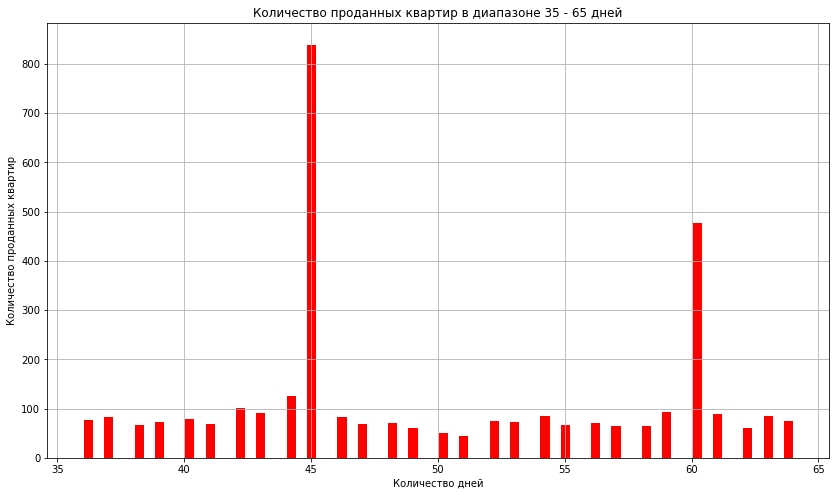

In [127]:
# Посмотрим на диапазон продаж 35 - 65 дней после удаления выбросов
data.query('35<days_exposition<65')['days_exposition'].hist(bins=70, figsize=(14,8),ec='white', color='red')
plt.title('Количество проданных квартир в диапазоне 35 - 65 дней')
plt.xlabel('Количество дней')
plt.ylabel('Количество проданных квартир')
plt.show()

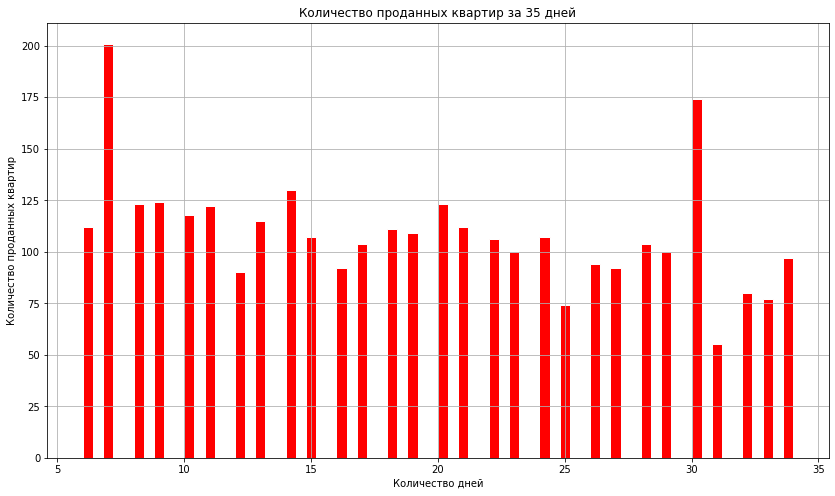

In [128]:
# Посмотрим на диапазон продаж 5 - 35 дней после удаления выбросов
data.query('5<days_exposition<35')['days_exposition'].hist(bins=70, figsize=(14,8),ec='white', color='red')
plt.title('Количество проданных квартир за 35 дней')
plt.xlabel('Количество дней')
plt.ylabel('Количество проданных квартир')
plt.show()

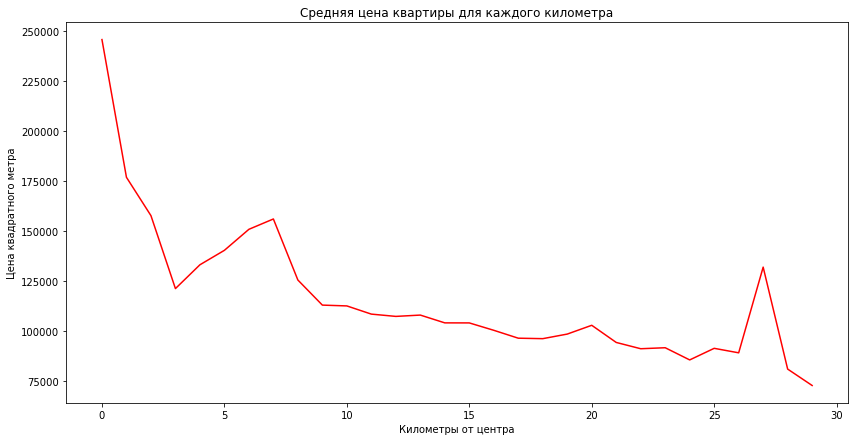

In [129]:
# Подсчитываем среднюю цену для каждого километра; строим график зависимости цены от удаления от центра 
# После удаления выбросов
data_spb.groupby('city_center_distance_km').agg({'sqm_price':'mean'}).sort_values(by='city_center_distance_km')\
.plot(figsize = (14,7), color='red',legend=False,)
plt.title('Средняя цена квартиры для каждого километра')
plt.xlabel('Километры от центра')
plt.ylabel('Цена квадратного метра')
plt.show()

Обобщенная корреляция (тепловая карта) по столбцу "Стоимость квартиры"


<AxesSubplot:>

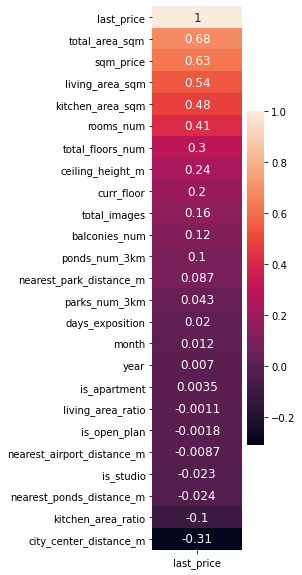

In [130]:
# Выводим тепловую карту для столбца 'last_price' после удаления выбросов
print('Обобщенная корреляция (тепловая карта) по столбцу "Стоимость квартиры"')
plt.figure(figsize=(2,10))
sns.heatmap(data.corr()[['last_price']].sort_values(by='last_price', ascending=False), 
            annot=True, annot_kws={'size':12})

### Шаг 5. Общий вывод

**Подготовка данных для анализа**
- Необходимые библиотеки импортированы
- Данные предобработаны
- Добавлены столбцы
- Данные приведены к единообразию по типам
- Сформулированы рабочие гипотезы
- Сформулированы промежуточные выводы

**Анализ данных**
- Получены срезы данных, необходимые для дальнейшего исследования
- Сформированы гистограммы и графики для анализа данных
- Построены матрицы корреляций
- Подверждены / отброшены рабочие гипотезы
- Сформулированы обшие выводы

**Общие выводы**
- На общую стоимость квартиры максимально влияет цена на квадратный метр, общая площадь, жилая площадь и площадь кухни
- Количество комнат также оказывает определенное влияние на стоимость квартиры
- Квартиры, расположенные на первом этаже стоят дешевле квартир на других этажах. В центральной зоне Санкт-Петербурга, кроме того, квартиры на верхних этажах стоят дороже, чем квартиры на этажах ниже
- По мере удаления от центра, стоимость квартир закономерно снижается, однако в некоторых случаях квартиры, расположенные на значительном удалении от центра города имеют высокую стоимость. Скорее всего, это жилполощадь, расположенная в приморской зоне
- Обычно, квартиры продаются в течение 1 - 2 месяцев. Однако, есть  квартиры, продающиеся год и более. Возможно, имеет место ошибка в работе с данными: квартира уже продана, а объявления еще не удалено из базы
- День и месяц публикации объявления не играют существенной роли ни в стоимости квартиры, ни в процессе продажи
- В 2014 году сделки с недвижимостью заключались интерсивно. В период с 2015 по 2018 год, рынок недвижимости просел из-за общей экономической ситуации, в 2019 году ситуация начала постепенно улучшаться

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод